# <font color= 'blue'>Problem statement 

- A financial organization wants to know the driving factors behind loan defaulting so that they can utilise these variables to  reduce the risk of loan default.
- Identifying such strong indicators will help them to reduce the loan amount/avoid approving loans to applicants with payment difficulties
- It can also be used to minimize rejecting loans of applicants who are actually capable of repaying.

- Let's try to identify such factors


#### We have the following data:

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

#### WORKFLOW

-> Reading 'application_data.csv' file as inp0
#### 1. Fixing rows and columns
  - In this segment I have looked at the data and found out that there are columns where more than half of the values were missing.
  - So I removed  those columns containing more than 50% missing values, from the dataframe inp0.
  - I also ran a sanity test and found that everyone except one person had 'FLAG_MOBIL' value as 1, which means they have provided mobile number, but for that one person who didn't give mobile number 'FLAG_CONT_MOBILE' value was 1, means he was reachable on mobile. So I understood that record was incorrectly entered, so I removed that row. After removing this row, everyone in the data set had 'FLAG_MOBIL' value as 1. So I  removed this column as it won't be of any use.

#### 2. Handling missing values
- Handling missing values in numerical columns
    - If the mean and median of the data were same or nearby(assumes that the data follows a normal distribution), the missing values were imputed with mean.
    - If the mean and median were away from each other, the missing values were imputed with median.
- Handling missing values in categorical columns
    - Missing values were imputed with the mode of the categorical columns
    - In the occupation type column,the number of missing values were higher than any other category. So I did not  impute the missing values with mode as it will exaggerate the actual number of Laborers (mode) in the column. I kept the missing values as it is.
    
#### 3. Handling data types of the variables
- Columns containing number of days, number of family members, number of defaulters in social surrounding, were converted from float dtype to int dtype

#### 4 .Handling  the outliers
- Boxplots of all the numerical columns (excluding the columns with boolean data/containg values as 1 or 0) were plotted on a single plot to identify outliers
- Outliers in AMT_INCOME_TOTAL column were capped at the 99th percentile.
- In the DAYS_EMPLOYED column, the values were entered with negative symbol,except the outlier '365243'.
- There were 55374 rows with value  365243 
-  This means  that 55374 individuals were working for more than 1000 yrs. Since this doesn't make sense I had a closer look at these records.
- I found that all unemployed(22) applicants  and 55352 pensioners make up the  55202 rows with 365243DAYS_EMPLOYED.
- As unemployed/pensioner applicants can't have DAYS_EMPLOYED (how many days before the application the person started current employment) value, I changed them to np.nan.
- In AMT_GOODS_PRICE and AMT_CREDIT columns the outliers were jsut outside the upperfence and were sort of continuous as well.
- Since these points were not invalid data, I didn't remove them. I treated them as normal points and later used median instead of mean for analysis.

#### 5. Standardising the variables
- Converted values in DAYS_REGISTRATION and DAYS_ID_PUBLISH columns,from negative to positive.
- In CODE_GENDER column the gender information of 4 applicants were entered as XNA, so I imputed them with mode (F)
- In NAME_TYPE_SUITE column 'Other_A' and 'Other_B' categories were replaced with 'Other'
- Age of applicants were provided in days, but since our target variable is not going to be affected much at the days/months level, I created a new column 'age' which had ages of applicants in years

#### 6. Checking for data imbalance
- Ratio of imbalance after cleaning the data= 11.39

#### 7. Univariate analysis

#### 8. Finding top 10 correlations
- I divided the data into two dataframes based on their traget value-'Target0' and 'Target1' for TARGET values 0 and 1 respectively.
- I created correlation matrix for all the numerical columns in Target0 and Target1 separately.
- Using the correlation matrices two heatmaps were generated.
- Top 10 correlations in each category were found by looking at the absolute values of correlation coefficients in the matrix.

#### 9. Bi/Multivariate analysis
- Correlation of Target values with other boolean columns(variables which had either 1 or 0 as values)were checked.
- Numeric- numeric analyses were done using scatter plot / correlation matrices
- Numeric-categorical variables were analyzed using bar charts and boxplots.
- Categorical-categorical analyses were done using  bar charts

#### 10. Reading previous_application.csv file as inp1
- Merged the two data frames inp0 and inp1 into final_df
- Few more analysis were performed on final_df
                                                        



#### Importing the libraries.

In [1]:
#importing the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the data set 'application_data.csv' in inp0
inp0=pd.read_csv("application_data.csv")

In [4]:
#having a look at the data
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
inp0.shape

(307511, 122)

In [6]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

<h1><font color='green'>1.Fixing the Rows and Columns 

In [7]:
#checking for summary rows/extra rows
inp0.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0



#### There are no summary rows/extra rows

-  From the head and tail of dataframe it seems like there are missing values in multiple columns.
-  Since there are 122 columns, removing columns with higher null value percentages will make the further analysis easier.

In [8]:
#creating a dataframe 'nullp' having column ids and corresponding null value percetage
nullp=100*inp0.isnull().sum()/len(inp0)
nullp=nullp.reset_index()
nullp.columns=['column','null%']
nullp.head()

,column,null%
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0


In [9]:
nullp['null%'].sort_values(ascending=False).head(50)

76    69.872297
48    69.872297
62    69.872297
70    69.432963
56    69.432963
84    69.432963
86    68.386172
68    68.354953
54    68.354953
82    68.354953
52    67.848630
66    67.848630
80    67.848630
75    66.497784
61    66.497784
47    66.497784
21    65.990810
81    59.376738
67    59.376738
53    59.376738
73    58.515956
45    58.515956
59    58.515956
41    56.381073
71    55.179164
57    55.179164
85    55.179164
77    53.295980
49    53.295980
63    53.295980
89    50.840783
72    50.749729
44    50.749729
58    50.749729
78    50.348768
50    50.348768
64    50.348768
55    50.193326
69    50.193326
83    50.193326
87    50.176091
65    49.760822
79    49.760822
51    49.760822
60    48.781019
74    48.781019
46    48.781019
88    48.268517
90    47.398304
28    31.345545
Name: null%, dtype: float64

In [10]:
#describing the dataframe nullp
nullp.describe()

,null%
count,122.000000
mean,24.395942
std,28.446507
min,0.000000
25%,0.000000
50%,0.332021
75%,50.818020
max,69.872297


In [11]:
#checking quantiles at .5,.55,.6 and .67
nullp.quantile([.5,.55,.6,.67])

,null%
0.50,0.332021
0.55,13.501631
0.60,40.977201
0.67,50.177298


-  Half of the columns have missing value percentage below .33%
-  40% of the columns have null% above 40.98%
-  67% of the columns have null% below 50.18%

-  so let's remove columns having more than 50 null%

In [12]:
#having a look at the columns having more than 50 null%
nullp[nullp['null%']>50]

,column,null%
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
52,FLOORSMIN_AVG,67.848630
53,LANDAREA_AVG,59.376738


In [13]:
#number of columns with null% above 50
nullp[nullp['null%']>50].shape

(41, 2)

In [14]:
#creating a new varible 'remove_these_columns' which contains the list of columns to be removed from inp0.
remove_these_columns=nullp[nullp['null%']>50]['column'].tolist()

In [15]:
# removing columns with null percentage above 50%
inp0.drop(remove_these_columns,axis=1,inplace=True)

In [16]:
inp0.shape

(307511, 81)

In [17]:
#checking number of people who have given mobile number
inp0.FLAG_MOBIL.value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

### Everyone except one person has given mob number, so let's check if he was reachable on mobile

In [18]:
inp0[inp0.FLAG_MOBIL==0][['FLAG_MOBIL','FLAG_CONT_MOBILE']].reset_index()

,index,FLAG_MOBIL,FLAG_CONT_MOBILE
0,15709,0,1


<h3><font color='red'> This doesn't make sense, because someone who hasn't provided mobile number can't be reachable on mobile.
    so removing this row.

In [19]:
#removing the row where FLAG_MOBIL ==1 (but FLAG_CONT_MOBILE ==0)
inp0=inp0[inp0.FLAG_MOBIL==1]

In [20]:
inp0.shape

(307510, 81)

In [21]:
#now everyone in the dataset has given mobile number so lets drop 'FLAG_MOBIL'  column from the dataset
inp0.drop('FLAG_MOBIL',axis=1,inplace=True)

In [22]:
inp0.shape

(307510, 80)

# <font color='green'>2.Handling missing values

In [23]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
   

In [24]:
#Numerical_columns in the data set
numerical_cols=inp0.describe().columns
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PH

- Some of the categorical variables have been represented with numbers in the data set.
-  for example if the applicant has given a particular document or not is actually two categories but here it is being represented as numbers 1&0 respectively.
- These columns are being considered as the numerical columns.

In [25]:
#categorical columns
categorical_cols=list(set(inp0.columns)-set(inp0.describe().columns))
categorical_cols

['NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'OCCUPATION_TYPE']

In [26]:
pd.set_option('display.max_rows',122)

In [27]:
#checking number of missing values in each column of the dataframe 
inp0.isnull().sum().sort_values(ascending= False)

FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_AVG     150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96390
EXT_SOURCE_3                     60964
AMT_REQ_CREDIT_BUREAU_QRT        41518
AMT_REQ_CREDIT_BUREAU_MON        41518
AMT_REQ_CREDIT_BUREAU_WEEK       41518
AMT_REQ_CREDIT_BUREAU_DAY        41518
AMT_REQ_CREDIT_BUREAU_HOUR       41518
AMT_REQ_CREDIT_BUREAU_YEAR       41518
NAME_TYPE_SUITE                   1292
OBS_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       659
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [28]:
#checking missing value percentages in each column(in previously created datframe nullp)
nullp

,column,null%
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [29]:
#sorting the null% values of columns that inp0 currently has (after fixing rows and columns)
nullp=nullp.set_index('column')
nullp.loc[inp0.columns.tolist()].sort_values(by='null%',ascending= False)

,null%
column,
FLOORSMAX_MEDI,49.760822
FLOORSMAX_MODE,49.760822
FLOORSMAX_AVG,49.760822
YEARS_BEGINEXPLUATATION_MEDI,48.781019
YEARS_BEGINEXPLUATATION_MODE,48.781019
YEARS_BEGINEXPLUATATION_AVG,48.781019
TOTALAREA_MODE,48.268517
EMERGENCYSTATE_MODE,47.398304
OCCUPATION_TYPE,31.345545


### <span style="text-decoration: underline"> Handling missing values in numerical columns 

#### Handling missing values in FLOORSMAX_MEDI column



In [30]:
inp0.FLOORSMAX_MEDI

0         0.0833
1         0.2917
2            NaN
3            NaN
4            NaN
           ...  
307506    0.6042
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_MEDI, Length: 307510, dtype: float64

In [31]:
inp0.FLOORSMAX_MEDI.describe()

count    154490.000000
mean          0.225896
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

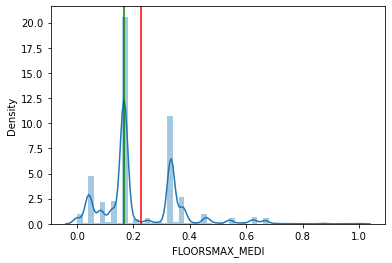

In [32]:
#plotting the distribution of FLOORSMAX_MEDI
sns.distplot(inp0.FLOORSMAX_MEDI)
plt.axvline(inp0['FLOORSMAX_MEDI'].mean(), color="red")
plt.axvline(inp0['FLOORSMAX_MEDI'].median(), color="green")

Mean and Median are different,indicating that it does not follow a normal distribution,so imputing the missing values with median

In [33]:
inp0.FLOORSMAX_MEDI.fillna(inp0.FLOORSMAX_MEDI.median(),inplace=True)

#### Handling missing values in FLOORSMAX_MODE 

In [34]:
inp0.FLOORSMAX_MODE

0         0.0833
1         0.2917
2            NaN
3            NaN
4            NaN
           ...  
307506    0.4583
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_MODE, Length: 307510, dtype: float64

In [35]:
inp0.FLOORSMAX_MODE.describe()

count    154490.000000
mean          0.222314
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

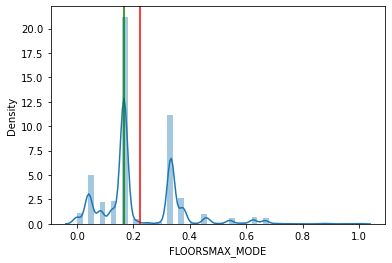

In [36]:
#plotting the distribution of FLOORSMAX_MODE
sns.distplot(inp0.FLOORSMAX_MODE)
plt.axvline(inp0['FLOORSMAX_MODE'].mean(), color="red")
plt.axvline(inp0['FLOORSMAX_MODE'].median(), color="green")

Mean and Median are different,indicating that it does not follow a normal distribution,so simputing the missing values with median

In [37]:
inp0.FLOORSMAX_MODE.fillna(inp0.FLOORSMAX_MODE.median(),inplace=True)

#### Handling missing values in FLOORSMAX_AVG                 

In [38]:
inp0.FLOORSMAX_AVG

0         0.0833
1         0.2917
2            NaN
3            NaN
4            NaN
           ...  
307506    0.6042
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_AVG, Length: 307510, dtype: float64

In [39]:
inp0.FLOORSMAX_AVG.describe()

count    154490.000000
mean          0.226281
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

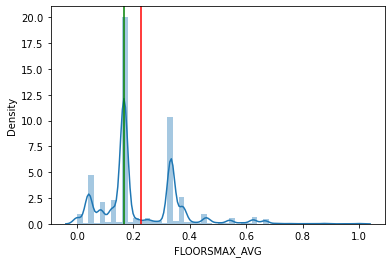

In [40]:
#plotting distribution of FLOORSMAX_AVG
sns.distplot(inp0.FLOORSMAX_AVG)
plt.axvline(inp0.FLOORSMAX_AVG.mean(),color='red')
plt.axvline(inp0.FLOORSMAX_AVG.median(),color='green')



Mean and Median are different,indicating that it does not follow a normal distribution,so simputing the missing values with median

In [41]:
inp0.FLOORSMAX_AVG.fillna(inp0.FLOORSMAX_AVG.median(),inplace=True)

#### Handling missing values in YEARS_BEGINEXPLUATATION_MEDI 

In [42]:
inp0.YEARS_BEGINEXPLUATATION_MEDI

0         0.9722
1         0.9851
2            NaN
3            NaN
4            NaN
           ...  
307506    0.9876
307507    0.9727
307508    0.9816
307509    0.9771
307510    0.9881
Name: YEARS_BEGINEXPLUATATION_MEDI, Length: 307510, dtype: float64

In [43]:
inp0.YEARS_BEGINEXPLUATATION_MEDI.describe()

count    157503.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

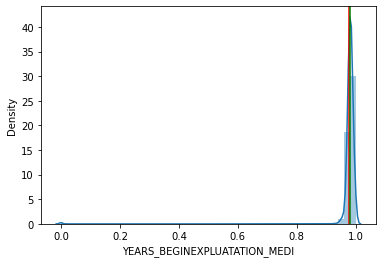

In [44]:
#plotting distribution of YEARS_BEGINEXPLUATATION_MEDI
sns.distplot(inp0.YEARS_BEGINEXPLUATATION_MEDI)
plt.axvline(inp0.YEARS_BEGINEXPLUATATION_MEDI.mean(),color='red')
plt.axvline(inp0.YEARS_BEGINEXPLUATATION_MEDI.median(),color='green')



Mean and Median are almost same, so let's assume that it follows a normal distribution and substitute the missing values with mean

In [45]:
inp0.YEARS_BEGINEXPLUATATION_MEDI.fillna(inp0.YEARS_BEGINEXPLUATATION_MEDI.mean(),inplace=True)

#### Handling missing values in YEARS_BEGINEXPLUATATION_MODE 

In [46]:
inp0.YEARS_BEGINEXPLUATATION_MODE 

0         0.9722
1         0.9851
2            NaN
3            NaN
4            NaN
           ...  
307506    0.9782
307507    0.9727
307508    0.9816
307509    0.9772
307510    0.9881
Name: YEARS_BEGINEXPLUATATION_MODE, Length: 307510, dtype: float64

In [47]:
inp0.YEARS_BEGINEXPLUATATION_MODE.describe()

count    157503.000000
mean          0.977065
std           0.064576
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

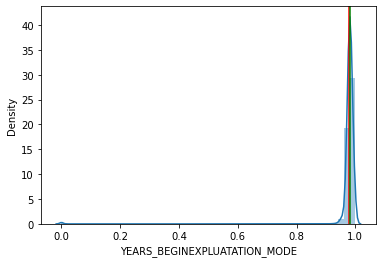

In [48]:
#plotting distribution of YEARS_BEGINEXPLUATATION_MODE 
sns.distplot(inp0.YEARS_BEGINEXPLUATATION_MODE )
plt.axvline(inp0.YEARS_BEGINEXPLUATATION_MODE.mean(),color='red')
plt.axvline(inp0.YEARS_BEGINEXPLUATATION_MODE.median(),color='green')



Mean and Median are almost same, so let's assume that it follows a normal distribution and substitute the missing values with mean

In [49]:
inp0.YEARS_BEGINEXPLUATATION_MODE.fillna(inp0.YEARS_BEGINEXPLUATATION_MODE.mean(),inplace=True)

#### Handling missing values in YEARS_BEGINEXPLUATATION_AVG

In [50]:
inp0.YEARS_BEGINEXPLUATATION_AVG

0         0.9722
1         0.9851
2            NaN
3            NaN
4            NaN
           ...  
307506    0.9876
307507    0.9727
307508    0.9816
307509    0.9771
307510    0.9881
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 307510, dtype: float64

In [51]:
inp0.YEARS_BEGINEXPLUATATION_AVG.describe()

count    157503.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

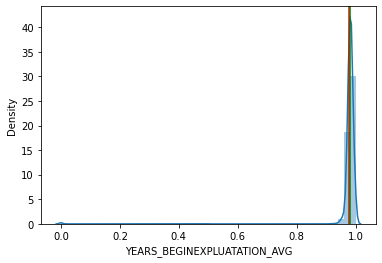

In [52]:
#plotting distribution of YEARS_BEGINEXPLUATATION_AVG
sns.distplot(inp0.YEARS_BEGINEXPLUATATION_AVG )
plt.axvline(inp0.YEARS_BEGINEXPLUATATION_AVG.mean(),color='red')
plt.axvline(inp0.YEARS_BEGINEXPLUATATION_AVG.median(),color='green')



Mean and Median are almost same, so let's assume that it follows a normal distribution and substitute the missing values with mean

In [53]:
inp0.YEARS_BEGINEXPLUATATION_AVG.fillna(inp0.YEARS_BEGINEXPLUATATION_AVG.mean(),inplace=True)

#### Handling missing values in TOTALAREA_MODE

In [54]:
inp0.TOTALAREA_MODE

0         0.0149
1         0.0714
2            NaN
3            NaN
4            NaN
           ...  
307506    0.2898
307507    0.0214
307508    0.7970
307509    0.0086
307510    0.0718
Name: TOTALAREA_MODE, Length: 307510, dtype: float64

In [55]:
inp0.TOTALAREA_MODE.describe()

count    159079.000000
mean          0.102547
std           0.107463
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

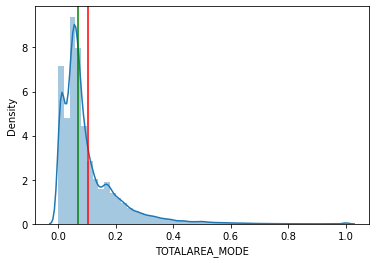

In [56]:
#plotting distribution of TOTALAREA_MODE
sns.distplot(inp0.TOTALAREA_MODE )
plt.axvline(inp0.TOTALAREA_MODE.mean(),color='red')
plt.axvline(inp0.TOTALAREA_MODE.median(),color='green')



Mean and Median are different,indicating that it does not follow a normal distribution,so simputing the missing values with median

In [57]:
inp0.TOTALAREA_MODE.fillna(inp0.TOTALAREA_MODE.median(),inplace=True)

#### Handling missing values in EXT_SOURCE_3

In [58]:
inp0.EXT_SOURCE_3

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307510, dtype: float64

In [59]:
inp0.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

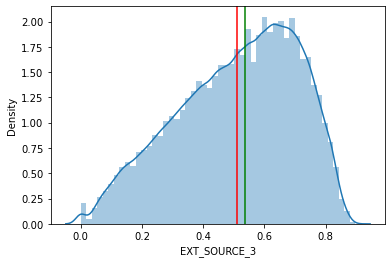

In [60]:
#plotting distribution of EXT_SOURCE_3
sns.distplot(inp0.EXT_SOURCE_3)
plt.axvline(inp0.EXT_SOURCE_3.mean(),color='red')
plt.axvline(inp0.EXT_SOURCE_3.median(),color='green')



Mean and Median almost same but from the distplot it is visible that the data is slightly skewed. So I would prefer imputing the missing values with median.

In [61]:
inp0.EXT_SOURCE_3.fillna(inp0.EXT_SOURCE_3.median(),inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_YEAR

In [62]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR

0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307510, dtype: float64

In [63]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

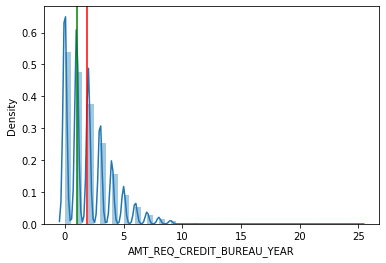

In [64]:
#plotting distribution of AMT_REQ_CREDIT_BUREAU_YEAR
sns.distplot(inp0.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mean(),color='red')
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_YEAR.median(),color='green')



Mean and Median are different,indicating that it does not follow a normal distribution,so simputing the missing values with median

In [65]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_QRT

In [66]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307510, dtype: float64

In [67]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

- Minimum value ,25th,50th and 75th percentile are same, that is zero
- But there is huge jump from 75th percentile to maximum value
- seems like data has some outliers

<AxesSubplot:>

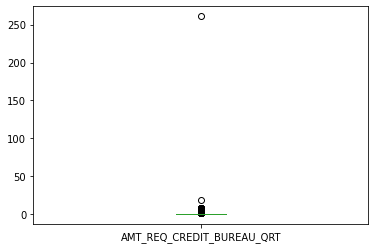

In [68]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.plot.box()

In [69]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

once we look at these individual values, we could say that the data is skewed,so we could replace the missing values with median

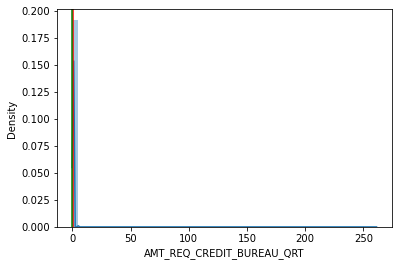

In [70]:
#plotting distribution of AMT_REQ_CREDIT_BUREAU_QRT
sns.distplot(inp0.AMT_REQ_CREDIT_BUREAU_QRT)
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_QRT.mean(),color='red')
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_QRT.median(),color='green')



In [71]:
# replacing the missing values with median in AMT_REQ_CREDIT_BUREAU_QRT
inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(inp0.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_MON 

In [72]:
inp0.AMT_REQ_CREDIT_BUREAU_MON 

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    2.0
Name: AMT_REQ_CREDIT_BUREAU_MON, Length: 307510, dtype: float64

In [73]:
inp0.AMT_REQ_CREDIT_BUREAU_MON .describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

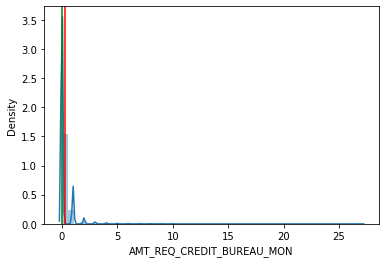

In [74]:
#plotting distribution of AMT_REQ_CREDIT_BUREAU_MON 
sns.distplot(inp0.AMT_REQ_CREDIT_BUREAU_MON)
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_MON.mean(),color='red')
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_MON.median(),color='green')



In [75]:
inp0.AMT_REQ_CREDIT_BUREAU_MON .value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

once we look at these individual values, we could say that the data is skewed,so we could replace the missing values with median

In [76]:
inp0.AMT_REQ_CREDIT_BUREAU_MON .fillna(inp0.AMT_REQ_CREDIT_BUREAU_MON .median(),inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_WEEK  

In [77]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK  

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, Length: 307510, dtype: float64

In [78]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK  .describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

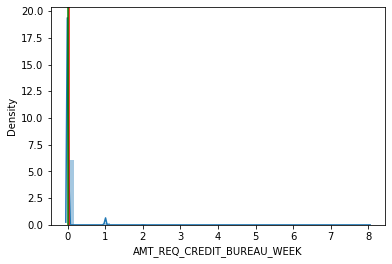

In [79]:
#plotting distribution of AMT_REQ_CREDIT_BUREAU_WEEK  
sns.distplot(inp0.AMT_REQ_CREDIT_BUREAU_WEEK )
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_WEEK .mean(),color='red')
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_WEEK .median(),color='green')



The data is skewed,so we could replace the missing values with median

In [80]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(inp0.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_DAY  

In [81]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY  

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 307510, dtype: float64

In [82]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

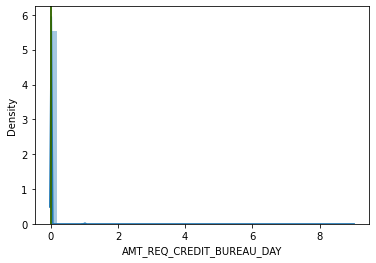

In [83]:
#plotting distribution of AMT_REQ_CREDIT_BUREAU_DAY  
sns.distplot(inp0.AMT_REQ_CREDIT_BUREAU_DAY )
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_DAY .mean(),color='red')
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_DAY .median(),color='green')



In [84]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

once we look at these individual values, we could say that the data is skewed,so we could replace the missing values with median

In [85]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(inp0.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_HOUR  

In [86]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR  

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307510, dtype: float64

In [87]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

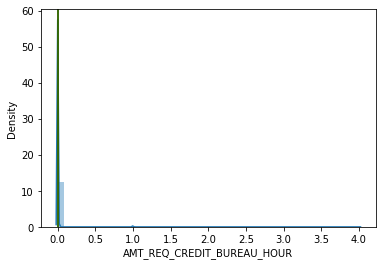

In [88]:
#plotting distribution of AMT_REQ_CREDIT_BUREAU_HOUR  
sns.distplot(inp0.AMT_REQ_CREDIT_BUREAU_HOUR )
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_HOUR .mean(),color='red')
plt.axvline(inp0.AMT_REQ_CREDIT_BUREAU_HOUR .median(),color='green')



Data is skewed, 25th, 50th and 75th percentiles are zero, then there is a jump to  maximum value of 4.
So imputing the missing values with median

In [89]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)

#### Handling missing values in OBS_60_CNT_SOCIAL_CIRCLE  

In [90]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE  

0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, Length: 307510, dtype: float64

In [91]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306489.000000
mean          1.405297
std           2.379806
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

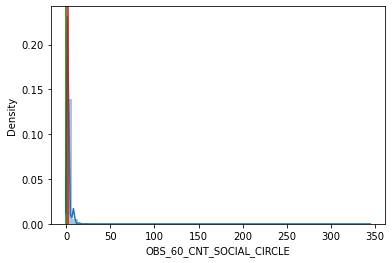

In [92]:
#plotting distribution of OBS_60_CNT_SOCIAL_CIRCLE  
sns.distplot(inp0.OBS_60_CNT_SOCIAL_CIRCLE )
plt.axvline(inp0.OBS_60_CNT_SOCIAL_CIRCLE .mean(),color='red')
plt.axvline(inp0.OBS_60_CNT_SOCIAL_CIRCLE .median(),color='green')



Data is skewed <br>
imputing with median

In [93]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.fillna(inp0.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

#### Handling missing values in OBS_30_CNT_SOCIAL_CIRCLE  

In [94]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE  

0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 307510, dtype: float64

In [95]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306489.000000
mean          1.422250
std           2.400991
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

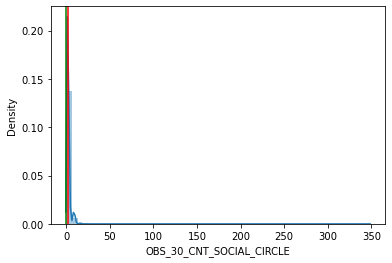

In [96]:
#plotting distribution of OBS_30_CNT_SOCIAL_CIRCLE  
sns.distplot(inp0.OBS_30_CNT_SOCIAL_CIRCLE )
plt.axvline(inp0.OBS_30_CNT_SOCIAL_CIRCLE.mean(),color='red')
plt.axvline(inp0.OBS_30_CNT_SOCIAL_CIRCLE.median(),color='green')



Data is skewed <br>
imputing with median

In [97]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.fillna(inp0.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

#### Handling missing values in DEF_30_CNT_SOCIAL_CIRCLE  

In [98]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE  

0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 307510, dtype: float64

In [99]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306489.000000
mean          0.143421
std           0.446699
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [100]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271323
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

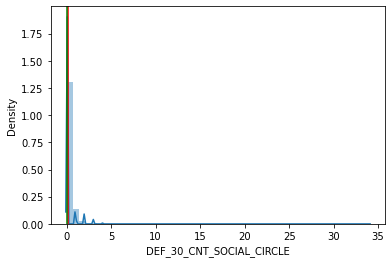

In [101]:
#plotting distribution of DEF_30_CNT_SOCIAL_CIRCLE  
sns.distplot(inp0.DEF_30_CNT_SOCIAL_CIRCLE )
plt.axvline(inp0.DEF_30_CNT_SOCIAL_CIRCLE .mean(),color='red')
plt.axvline(inp0.DEF_30_CNT_SOCIAL_CIRCLE .median(),color='green')



Data is skewed <br>
imputing with median

In [102]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.fillna(inp0.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

#### Handling missing values in DEF_60_CNT_SOCIAL_CIRCLE  

In [103]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE  

0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, Length: 307510, dtype: float64

In [104]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306489.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [105]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280720
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

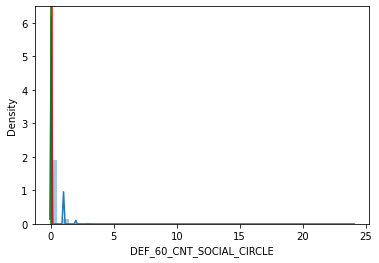

In [106]:
#plotting distribution of DEF_60_CNT_SOCIAL_CIRCLE  
sns.distplot(inp0.DEF_60_CNT_SOCIAL_CIRCLE )
plt.axvline(inp0.DEF_60_CNT_SOCIAL_CIRCLE .mean(),color='red')
plt.axvline(inp0.DEF_60_CNT_SOCIAL_CIRCLE .median(),color='green')



Data is skewed <br>
imputing with median

In [107]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.fillna(inp0.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

#### Handling missing values in EXT_SOURCE_2   

In [108]:
inp0.EXT_SOURCE_2   

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307510, dtype: float64

In [109]:
inp0.EXT_SOURCE_2 .describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

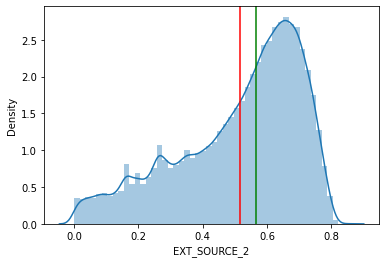

In [110]:
#plotting distribution of EXT_SOURCE_2   
sns.distplot(inp0.EXT_SOURCE_2  )
plt.axvline(inp0.EXT_SOURCE_2.mean(),color='red')
plt.axvline(inp0.EXT_SOURCE_2.median(),color='green')



Mean and Median are not same
so let's  substitute the missing values with median

In [111]:
inp0.EXT_SOURCE_2.fillna(inp0.EXT_SOURCE_2.median(),inplace=True)

#### Handling missing values in AMT_GOODS_PRICE   

In [112]:
inp0.AMT_GOODS_PRICE   

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307510, dtype: float64

In [113]:
inp0.AMT_GOODS_PRICE .describe()

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

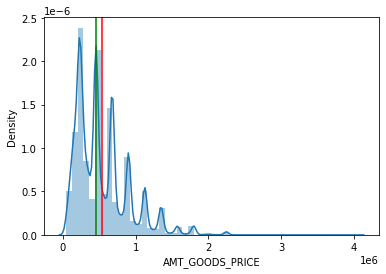

In [114]:
#plotting distribution of AMT_GOODS_PRICE   
sns.distplot(inp0.AMT_GOODS_PRICE  )
plt.axvline(inp0.AMT_GOODS_PRICE  .mean(),color='red')
plt.axvline(inp0.AMT_GOODS_PRICE  .median(),color='green')



Data is skewed <br>
imputing with median

In [115]:
inp0.AMT_GOODS_PRICE.fillna(inp0.AMT_GOODS_PRICE.median(),inplace=True)

#### Handling missing values in CNT_FAM_MEMBERS     

In [116]:
inp0.CNT_FAM_MEMBERS     

0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307510, dtype: float64

In [117]:
inp0.CNT_FAM_MEMBERS.describe()

count    307508.000000
mean          2.152666
std           0.910683
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

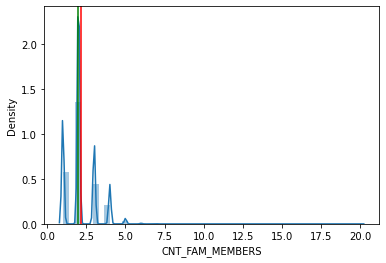

In [118]:
#plotting distribution of CNT_FAM_MEMBERS     
sns.distplot(inp0.CNT_FAM_MEMBERS    )
plt.axvline(inp0.CNT_FAM_MEMBERS.mean(),color='red')
plt.axvline(inp0.CNT_FAM_MEMBERS.median(),color='green')



Mean and Median are almost same, so let's assume that it follows a normal distribution and substitute the missing values with mean

In [119]:
inp0.CNT_FAM_MEMBERS.fillna(inp0.CNT_FAM_MEMBERS.mean(),inplace=True)

#### Handling missing values in AMT_Annuity 

In [120]:
inp0.AMT_ANNUITY.describe()

count    307498.000000
mean      27108.577804
std       14493.760721
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

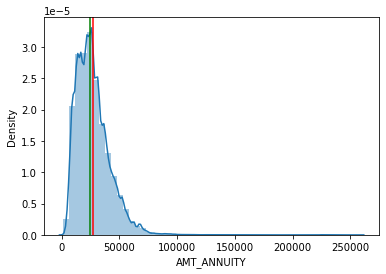

In [121]:
#plotting distribution of AMT_ANNUITY 
sns.distplot(inp0.AMT_ANNUITY )
plt.axvline(inp0.AMT_ANNUITY .mean(),color='red')
plt.axvline(inp0.AMT_ANNUITY .median(),color='green')



-  Mean and Median are almost same
-  So I am imputing the missing values with mean

In [122]:
inp0.AMT_ANNUITY.fillna(inp0.AMT_ANNUITY.mean(),inplace=True)

### <span style="text-decoration: underline"> Handling missing values in categorical columns 

#### Handling missing values in EMERGENCYSTATE_MODE 

In [123]:
inp0.EMERGENCYSTATE_MODE.value_counts(dropna=False)

No     159427
NaN    145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

EMERGENCYSTATE_MODE is a categorical column, so I will impute the missing values with mode

In [124]:
inp0.EMERGENCYSTATE_MODE.fillna(inp0.EMERGENCYSTATE_MODE.mode()[0],inplace=True)

#### Handling missing values in OCCUPATION_TYPE 

In [125]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)

NaN                      0.313453
Laborers                 0.179461
Sales staff              0.104393
Core staff               0.089656
Managers                 0.069497
Drivers                  0.060496
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

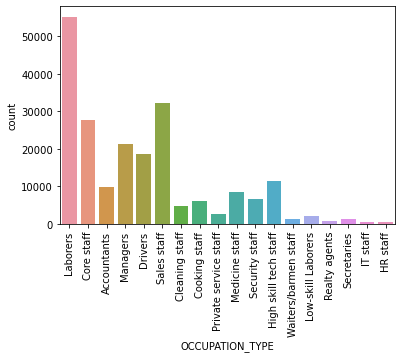

In [126]:
sns.countplot(inp0.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.show()

In [127]:
inp0.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

Here the number of missing values is higher than any other category in the occupation type. So I do not want to impute the missing values with mode as it will exaggerate the actual number of Laborers in the column.
I will keep the missing values as it is

#### Handling missing values in NAME_TYPE_SUITE column

In [128]:
#checking the values and their percentage in the column
inp0.NAME_TYPE_SUITE.value_counts(normalize=True,dropna=False)

Unaccompanied      0.808185
Family             0.130562
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

Here NAME_TYPE_SUITE  is categorical variable with mode Unaccompanied, so I will replace the missing values with mode.

In [129]:
#replacing missing values with mode of the column
inp0.NAME_TYPE_SUITE=inp0.NAME_TYPE_SUITE.fillna(inp0.NAME_TYPE_SUITE.mode()[0])

In [130]:
#checking missing values in dataframe again.
inp0.isnull().sum().sort_values(ascending =False)

OCCUPATION_TYPE                 96390
SK_ID_CURR                          0
YEARS_BEGINEXPLUATATION_AVG         0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
OBS_30_CNT_SOCIAL_CIRCLE            0
EMERGENCYSTATE_MODE                 0
TOTALAREA_MODE                      0
FLOORSMAX_MEDI                      0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLAG_DOCUMENT_7                     0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_9                     0
FLAG_DOCUMENT_19                    0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_MON           0
AMT_REQ_CREDIT_BUREAU_WEEK          0
AMT_REQ_CRED

# <font color='green'>3.Handling data types of the variables

In [131]:
#Checking dtypes of variables
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307510 non-null  int64  
 1   TARGET                        307510 non-null  int64  
 2   NAME_CONTRACT_TYPE            307510 non-null  object 
 3   CODE_GENDER                   307510 non-null  object 
 4   FLAG_OWN_CAR                  307510 non-null  object 
 5   FLAG_OWN_REALTY               307510 non-null  object 
 6   CNT_CHILDREN                  307510 non-null  int64  
 7   AMT_INCOME_TOTAL              307510 non-null  float64
 8   AMT_CREDIT                    307510 non-null  float64
 9   AMT_ANNUITY                   307510 non-null  float64
 10  AMT_GOODS_PRICE               307510 non-null  float64
 11  NAME_TYPE_SUITE               307510 non-null  object 
 12  NAME_INCOME_TYPE              307510 non-nul

#### Number of days should have int dtype

In [132]:
#converting dtype from float to int
inp0.DAYS_REGISTRATION=inp0.DAYS_REGISTRATION.astype(int)

In [133]:
#converting dtype from float to int
inp0.DAYS_LAST_PHONE_CHANGE=inp0.DAYS_LAST_PHONE_CHANGE.astype(int)

#### Number of family members should have int dtype

In [134]:
#converting dtype from float to int
inp0.CNT_FAM_MEMBERS=inp0.CNT_FAM_MEMBERS.astype(int)

#### Number of defaulters should be of int dtype

In [135]:
#converting dtype from float to int
inp0[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
      'DEF_60_CNT_SOCIAL_CIRCLE']]=inp0[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                         'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].astype(int)

# <font color='green'> 4.Handling  the outliers

In [136]:
#numerical columns 
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PH

- Among the numerical columns, few columns have boolean data, which has only two numerical values ie, either 1 or 0.
- So I will create a new variable 'numer' which contains  numerical columns without these boolean columns

In [137]:
#adding columns containg either 1 or 0 as values to a list
bool=['TARGET','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
          'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [138]:
#numerical_cols-bool
numer=[i for i in numerical_cols if i not in bool]

In [139]:
numer

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_R

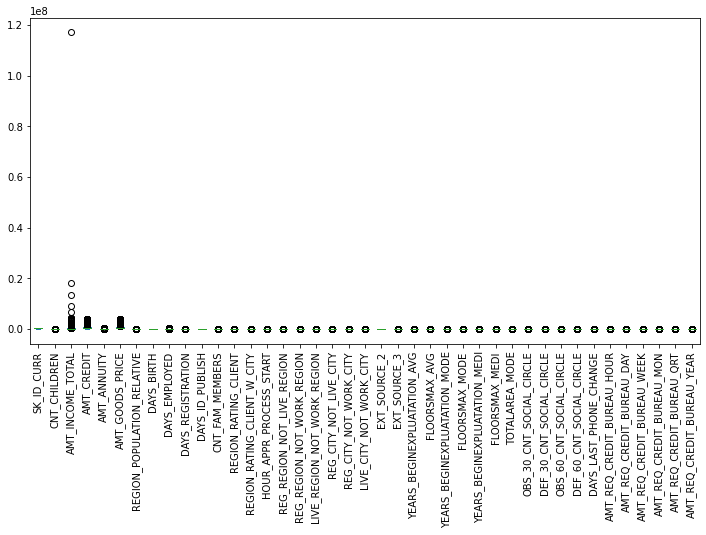

In [140]:
#for checking outliers I am plotting numerical columns over boxplots

inp0[numer].plot.box(figsize=(12,6))
plt.xticks(rotation=90)

plt.show()

-  columns- SK_ID_CURR,DAYS_BIRTH,DAYS_ID_PUBLISHED and EXT_SOURCE_2 do not have any outliers
-  Outlier of AMT_INCOME_TOTAL is clearly visible
-  Let's check AMT_INCOME_TOTAL column

#### AMT_INCOME_TOTAL column

In [141]:
#checking AMT_INCOME_TOTAL column
inp0.AMT_INCOME_TOTAL.head(15)

0     202500.000
1     270000.000
2      67500.000
3     135000.000
4     121500.000
5      99000.000
6     171000.000
7     360000.000
8     112500.000
9     135000.000
10    112500.000
11     38419.155
12     67500.000
13    225000.000
14    189000.000
Name: AMT_INCOME_TOTAL, dtype: float64

Let's round the values to 2 decimals

In [142]:
inp0.AMT_INCOME_TOTAL=inp0.AMT_INCOME_TOTAL.round(2)
inp0.AMT_INCOME_TOTAL.head(15)

0     202500.00
1     270000.00
2      67500.00
3     135000.00
4     121500.00
5      99000.00
6     171000.00
7     360000.00
8     112500.00
9     135000.00
10    112500.00
11     38419.16
12     67500.00
13    225000.00
14    189000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [143]:
inp0.AMT_INCOME_TOTAL.describe()

count    3.075100e+05
mean     1.687981e+05
std      2.371235e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

-  Here mean and median of the total income data are nearly same
-  The income value slowly increases over 25th,50th and 75th prcentiles.
-  But there is a huge difference between 75 th percentile and maximum. - indicating presence of outliers

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

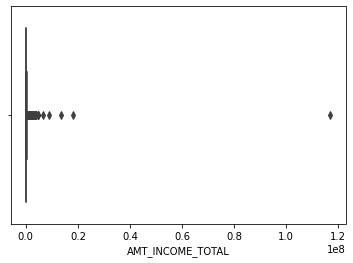

In [144]:
#plotting boxplot of Income
sns.boxplot(inp0.AMT_INCOME_TOTAL)

-  We could clearly see the outliers in the boxplot
-  A small fraction of the applicants having extremely high salary


In [145]:
#checking .9,.95,.98,.99,.9999,.99999 quantiles of income
inp0.AMT_INCOME_TOTAL.quantile([.9,.95,.98,.99,.99999,1])

0.90000    2.700000e+05
0.95000    3.375000e+05
0.98000    4.275000e+05
0.99000    4.725000e+05
0.99999    8.831048e+06
1.00000    1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

-  99% of the applicants have income total below 472500
-  Only 1% of applicants have income above 472500
-  let's check howmany records have income total above 8.831048e+06(ie 99.999th percentile)
 

In [146]:
inp0[inp0.AMT_INCOME_TOTAL> 8.831048e+06]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


-  Even the applicants with highest total income facing payement difficulties (target=1)
-  So I do not want to drop these records
-  I will cap them with 99th percentile (472500)

In [147]:
#checking how many rows have AMT_INCOME_TOTAL above 472500
inp0[inp0.AMT_INCOME_TOTAL>472500].shape

(3014, 80)

In [148]:
#caping income total at 472500
inp0.AMT_INCOME_TOTAL=inp0.AMT_INCOME_TOTAL.apply(lambda x: x if x<=472500 else 472500)

In [149]:
#Describing income total
inp0.AMT_INCOME_TOTAL.describe()

count    307510.000000
mean     166026.052502
std       83063.572949
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

-  Now there isn't much of a difference between mean and median
-  income slowly increases over 25th, 50th and 75th percntiles
-  maximum and minimum values are in normal range

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

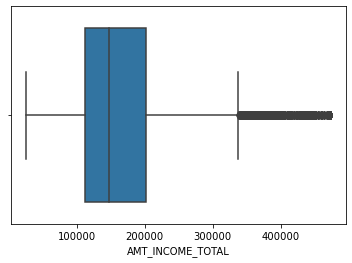

In [150]:
#plotting boxplot of income total
sns.boxplot(inp0.AMT_INCOME_TOTAL)

Now let's have alook at outliers of numerical columns again

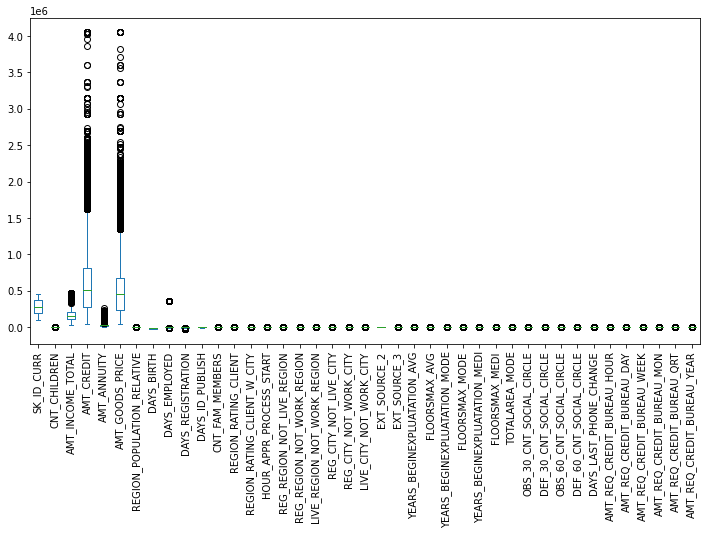

In [151]:
#outliers of numerical columns

inp0[numer].plot.box(figsize=(12,6))
plt.xticks(rotation=90)

plt.show()

 -  We could see outliers in DAYS_EMPLOYED,AMT_GOODS_PRICE and AMT_CREDIT
 -  Let's have a look at DAYS_EMPLOYED column

#### DAYS_EMPLOYED  - How many days before the application the person started current employment        

In [152]:
#describing days employed column
inp0.DAYS_EMPLOYED.describe()

count    307510.000000
mean      63815.254379
std      141275.948927
min      -17912.000000
25%       -2760.000000
50%       -1213.500000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

-  Mean is a positive value while median is a negative value
- let's have a closer look at the values in this column

In [153]:
inp0.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

<font color=red>There are 55374 rows with  365243 DAYS_EMPLOYED(working for more than 1000 yrs.)

In [154]:
#checking howmany values are above zero
inp0[inp0.DAYS_EMPLOYED>0].DAYS_EMPLOYED.value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

In [155]:
inp0.shape

(307510, 80)

-  These 55374 points are way out of the range.
-  365243 is the only positive value in the column
-  These could be missing data/not applicable data noted as 365243
-  Let's check the days employed by unemployed applicants to verify this 

In [156]:
#days_employed of unemployed applicants
inp0[inp0.NAME_INCOME_TYPE=='Unemployed']['DAYS_EMPLOYED'].reset_index()

,index,DAYS_EMPLOYED
0,1156,365243
1,3937,365243
2,23834,365243
3,35352,365243
4,37512,365243
5,41723,365243
6,77179,365243
7,78336,365243
8,80704,365243
9,92061,365243


- There are 22 unemployed applicants with days employed as 365243
- But there are 55374 rows with days employed as 365243
- So let's check who else contribute to this.
- Let's check the days employed values of pensioners

In [157]:
#days employed values of pensioners
inp0[inp0.NAME_INCOME_TYPE=='Pensioner']['DAYS_EMPLOYED'].value_counts()

 365243    55352
-1346          1
-5111          1
-2341          1
-11194         1
-12865         1
-1895          1
-8140          1
-3261          1
-1636          1
-1669          1
Name: DAYS_EMPLOYED, dtype: int64

- 55352 pensioners have days employed value as 365243
- 10 pensioners are having other values

<font color=red>There are 55374 rows with DAYS_EMPLOYED value as 365243(working for more than 1000 yrs)<br>
<font color=red>All unemployed(22) applicants  and 55352 pensioners make up the  55202 rows with 365243DAYS_EMPLOYED

-  Let's change the value 365243 to np.nan and make all the other values to positive numbers

In [158]:
inp0.DAYS_EMPLOYED=inp0.DAYS_EMPLOYED.apply(lambda x: np.nan if x==365243 else -x)

- We saw that 10 pensioners are having  values other than 365243 in days_employed column
- A pensioner is a person who lives on a pension, and shouldn't be having a value in 'How many days before the application the person started current employment' column.
- We do not know if the mistake happened in DAYS_EMPLOYED column or in NAME_INCOME_TYPE column
- So let's remove the records of these 10 pensioners

In [159]:
#removing applicants who are pensioners and have positive value in days employed column
inp0=inp0[-((inp0.NAME_INCOME_TYPE=='Pensioner')& (inp0.DAYS_EMPLOYED>0))]

In [160]:
inp0.shape

(307500, 80)

In [161]:
#let's descibe the modified Days employed column
inp0.DAYS_EMPLOYED.describe()

count    252126.000000
mean       2384.076018
std        2338.211391
min           0.000000
25%         767.000000
50%        1647.500000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

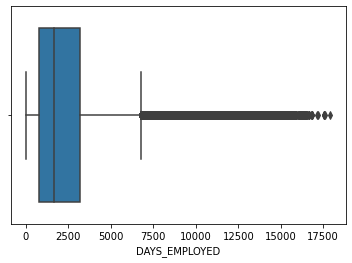

In [162]:
#box plot of days employed
sns.boxplot(inp0.DAYS_EMPLOYED)

-  The values above upper fence are sort of continuous and I will not be treating them as outliers.


Now let's have alook at outliers of numerical columns again

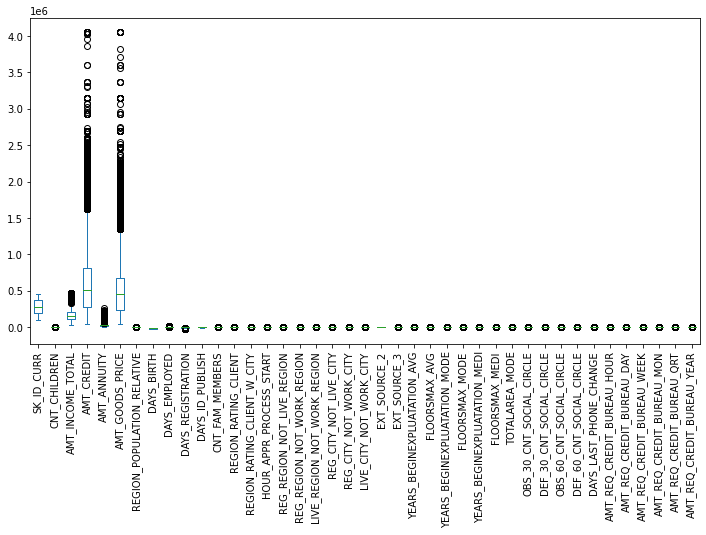

In [163]:
#outliers of numerical columns

inp0[numer].plot.box(figsize=(12,6))
plt.xticks(rotation=90)

plt.show()

 -  We could see outliers in AMT_GOODS_PRICE and AMT_CREDIT
 -  Let's have a look at AMT_GOODS_PRICE  column

#### AMT_GOODS_PRICE 

In [164]:
inp0.AMT_GOODS_PRICE.describe()

count    3.075000e+05
mean     5.383242e+05
std      3.692922e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

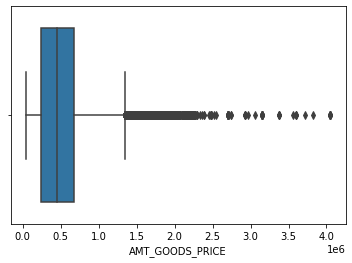

In [165]:
sns.boxplot(inp0.AMT_GOODS_PRICE)

In [166]:
inp0.AMT_GOODS_PRICE.quantile([.5,.75,.9,.95,.99])

0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

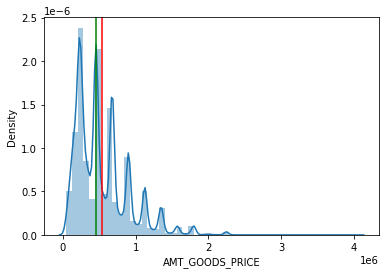

In [167]:
sns.distplot(inp0.AMT_GOODS_PRICE  )
plt.axvline(inp0.AMT_GOODS_PRICE.mean(),color='red')
plt.axvline(inp0.AMT_GOODS_PRICE.median(),color='green')

-  Here the mean and median are close to each other
-  Goods price gradually increase over 25th,50 and 75th percentiles
-  in the boxplot we could see the points above upper fence are sort of continuous.
-  These are not invalid points so I will not be removing these outliers rather I will consider them as normal points.
-  i will look into the median/percentile instead of mean

#### AMT_CREDIT column-Credit amount of the loan

In [168]:
#describing credit amount
inp0.AMT_CREDIT.describe()

count    3.075000e+05
mean     5.990389e+05
std      4.024917e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

-  Mean and median of the credit amount of the loan are nearly same
- The values increasing slowly over 25th,50th and 75th percetiles
- But from 75th percentile to maximum value, there is a jump.
- This could be because of outliers

<AxesSubplot:xlabel='AMT_CREDIT'>

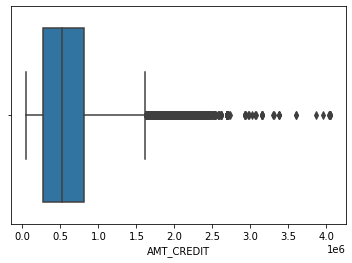

In [169]:
#plotting credit amount
sns.boxplot(inp0.AMT_CREDIT)

In [170]:
inp0.AMT_CREDIT.quantile([.75,.9,.95,.99])

0.75     808650.00
0.90    1133748.00
0.95    1350000.00
0.99    1854005.04
Name: AMT_CREDIT, dtype: float64

-  only 1% of applicants have credit amount above 1854005.04
-  However I do not want to treat them as outliers
-  These are just applicants with high credit amount not invalid data
-  So I will keep them as normal data points

# <font color='green'>5.Standardising the variables 

#### DAYS_REGISTRATION---How many days before the application did client change his registration

In [171]:
#describing days registration column
inp0.DAYS_REGISTRATION.describe()

count    307500.000000
mean      -4986.055174
std        3522.838768
min      -24672.000000
25%       -7479.000000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

- Mean and median are nearly same
- maximum value is zero
- Days are stored as negative values, so let's convert them to positive values

In [172]:
#convertig all the negative values into positive and keeping zero as it is.
inp0.DAYS_REGISTRATION=inp0.DAYS_REGISTRATION.apply(lambda x: abs(x))

#### SK_ID_CURR column

In [173]:
len(inp0)

307500

In [174]:
#checking the count of each value in the data frame
inp0.SK_ID_CURR.value_counts()

100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218991    1
218990    1
218989    1
218988    1
456255    1
Name: SK_ID_CURR, Length: 307500, dtype: int64

-  Here the length of SK_ID_CURR.value_counts and the number of rows in inp0 are same, which impilies that all the ids are unique!!!

#### CODE_GENDER column

In [175]:
#checking the number of each gender in the column
inp0.CODE_GENDER.value_counts()

F      202441
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

-  4 people have not provded the gender information.
-  it is a very small fraction of the entire dataset.
-  In inp0 the number of females are nearly twice as males
-  so I will replace XNA with F

In [176]:
inp0.CODE_GENDER.replace('XNA','F',inplace=True)

In [177]:
#confirming the value_counts
inp0.CODE_GENDER.value_counts()

F    202445
M    105055
Name: CODE_GENDER, dtype: int64

#### NAME_TYPE_SUITE- Who was accompanying client when he was applying for the loan

In [178]:
#checking the different values and their count in name type suit column
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249808
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [179]:
#combining other_A and other_B together as 'Other'
inp0.NAME_TYPE_SUITE.replace(['Other_B','Other_A'],'Other',inplace=True)
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249808
Family              40148
Spouse, partner     11370
Children             3267
Other                2636
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### DAYS_ID_PUBLISH
#### How many days before the application did client change the identity document with which he applied for the loan

In [180]:
inp0.DAYS_ID_PUBLISH.describe()

count    307500.000000
mean      -2994.184127
std        1509.455083
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

-  days are recorded as negative values
-  Mean and median are comparable
- maximum value is zero


In [181]:
#converting negative values to positive and keeping zero as it is
inp0.DAYS_ID_PUBLISH=inp0.DAYS_ID_PUBLISH.apply(lambda x: abs(x))

In [182]:
# describing the modified variable again
inp0.DAYS_ID_PUBLISH.describe()

count    307500.000000
mean       2994.184127
std        1509.455083
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

-  All values are now positive

#### DAYS_BIRTH column

In [183]:
inp0.DAYS_BIRTH.describe()

count    307500.000000
mean     -16036.891363
std        4363.974087
min      -25229.000000
25%      -19681.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

#### I would rather have an age column where age is represented in years.
because our target variable is not going to be affected much at the days/months level

In [184]:
#creating  a new column 'age' which contains the age of applicant in years
inp0['age']=-inp0.DAYS_BIRTH//365
inp0.age

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: age, Length: 307500, dtype: int64

In [185]:
#removing inp0.DAYS_BIRTH column
inp0.drop('DAYS_BIRTH',axis=1,inplace=True)

In [186]:
#describing age
inp0.age.describe()

count    307500.000000
mean         43.435685
std          11.954552
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: age, dtype: float64

-  Age is increasing slowly over 25th,50th and 75th percentiles
-  Mean and median are same

<AxesSubplot:xlabel='age'>

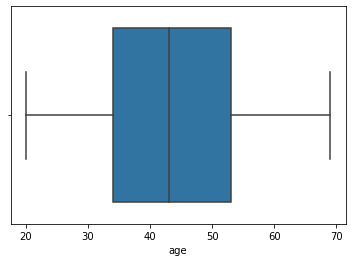

In [187]:
#boxplotting age
sns.boxplot(inp0.age)

# <font color='green'> 6.Checking for data imbalance

Text(0.5, 1.0, 'Count plot of Target values')

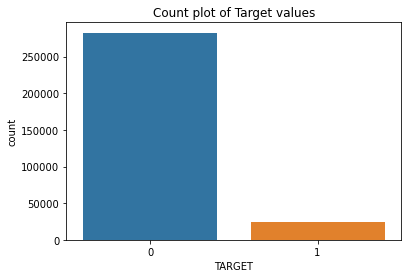

In [345]:
#Plotting the number of applicants with(or without) previous payement difficulties.
sns.countplot(inp0.TARGET)
plt.title('Count plot of Target values')

In [189]:
inp0.TARGET.value_counts(normalize=True)

0    0.919268
1    0.080732
Name: TARGET, dtype: float64

- Yes, there is an imbalance
- Among the applicants 91.9% of them are non defaulters and 8.1% of them had payment difficulties in the previous applications


In [190]:
#number of people with payment difficulties in the previous applications

len(inp0[inp0.TARGET==1])

24825

In [191]:
#no. of others
len(inp0[inp0.TARGET==0])

282675

In [192]:
#Ratio of imbalance
len(inp0[inp0.TARGET==0])/len(inp0[inp0.TARGET==1])

11.386706948640484

# <font color='green'>7.Univariate analysis

#### NAME_CONTRACT_TYPE

In [193]:
#calculating the percentage of each contract type
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904816
Revolving loans    0.095184
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

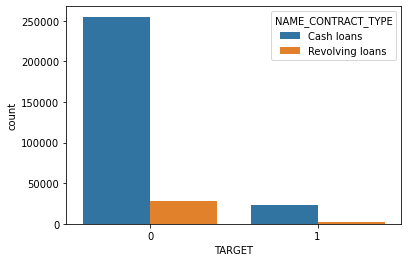

In [194]:
#Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.NAME_CONTRACT_TYPE)


-  90% of the loans are cash loans
-  So cash loans are major type of contract even among people who had payement difficulties

#### CODE_GENDER

In [195]:
#calculating the percentage of each gender
inp0.CODE_GENDER.value_counts(normalize=True)

F    0.658358
M    0.341642
Name: CODE_GENDER, dtype: float64

Text(0.5, 1.0, 'Gender types plotted as their count')

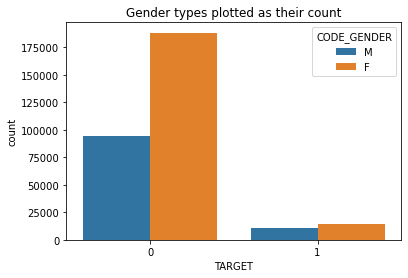

In [346]:
sns.countplot( inp0.TARGET,hue=inp0.CODE_GENDER)
plt.title('Gender types plotted as their count')

-  Most of the applicants are females (~66%)


#### NAME_TYPE_SUITE

In [197]:
#calculating the percentage of each category of name type suite
inp0.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.812384
Family             0.130563
Spouse, partner    0.036976
Children           0.010624
Other              0.008572
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

<AxesSubplot:>

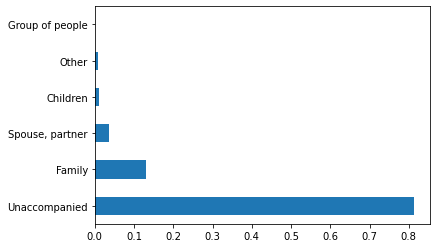

In [198]:
#plotting bar graph of the same
inp0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()

<AxesSubplot:xlabel='TARGET', ylabel='count'>

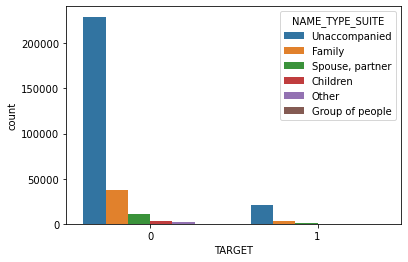

In [199]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.NAME_TYPE_SUITE)

-  Most of the applicants (81%) had visited the financial institution unaccompanied.So among the defaulters the number of applicants who came alone is high.

#### NAME_INCOME_TYPE

In [200]:
#calculating the percentage of each income type
inp0.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516335
Commercial associate    0.232901
Pensioner               0.180007
State servant           0.070579
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

Text(0.5, 1.0, 'Income type for target in terms of total count')

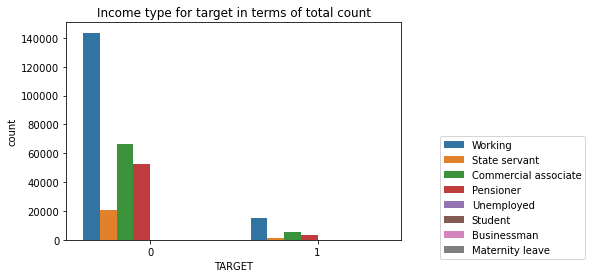

In [355]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.NAME_INCOME_TYPE)
plt.legend(bbox_to_anchor=(1.1,.5))
plt.title('Income type for target in terms of total count')

-  Most of the applicants belong to working class or commercial associate class
-  Among the applicants the percentage of people who are unemployed/student/businessman or on maternity leave are very small
-  As the number of applicants in income type categories increases, the number of defaulting also increases.
-  defaulting by students or businessmen are very less

#### NAME_HOUSING_TYPE

In [202]:
#calculating the percentage of each housing type
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887343
With parents           0.048260
Municipal apartment    0.036364
Rented apartment       0.015873
Office apartment       0.008511
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

Text(0.5, 1.0, 'Housing type for target in terms of total count')

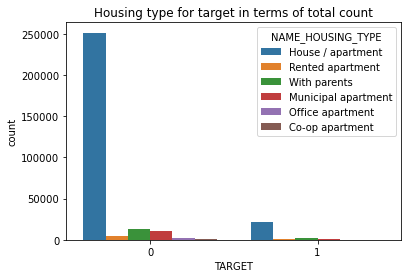

In [356]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.NAME_HOUSING_TYPE)
plt.title('Housing type for target in terms of total count')

-  Most of the applicants live in house/apartment and their number of defaulting is higher than applicants with other housing types

#### NAME_FAMILY_STATUS

In [204]:
#calculating the percentage of applicants with each family status
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.638790
Single / not married    0.147782
Civil marriage          0.096823
Separated               0.064286
Widow                   0.052312
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

Text(0.5, 1.0, 'Normalized value count for family status categories')

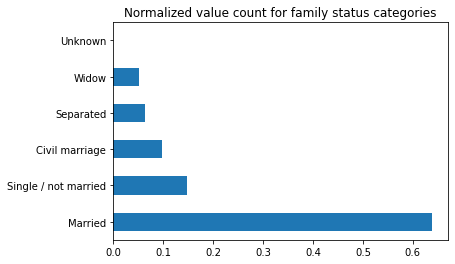

In [358]:
#plotting the result on a bar chart
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Normalized value count for family status categories')

Text(0.5, 1.0, 'Family status for target in terms of total count')

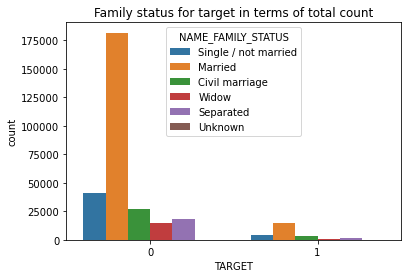

In [357]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.NAME_FAMILY_STATUS)
plt.title('Family status for target in terms of total count')

- Married people are more likely to apply for loan.
- ~64% of the applicants are married.


#### ORGANIZATION_TYPE

In [207]:
#calculating the percentage of each organization type
inp0.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221102
XNA                       0.180078
Self-employed             0.124914
Other                     0.054254
Medicine                  0.036397
Business Entity Type 2    0.034315
Government                0.033834
School                    0.028917
Trade: type 7             0.025463
Kindergarten              0.022374
Construction              0.021857
Business Entity Type 1    0.019460
Transport: type 4         0.017554
Trade: type 3             0.011353
Industry: type 9          0.010950
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009620
Industry: type 11         0.008793
Military                  0.008563
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007015
Security Ministries       0.006420
Trade: type 2             0.006179
Restaurant                0.005889
Services            

<AxesSubplot:>

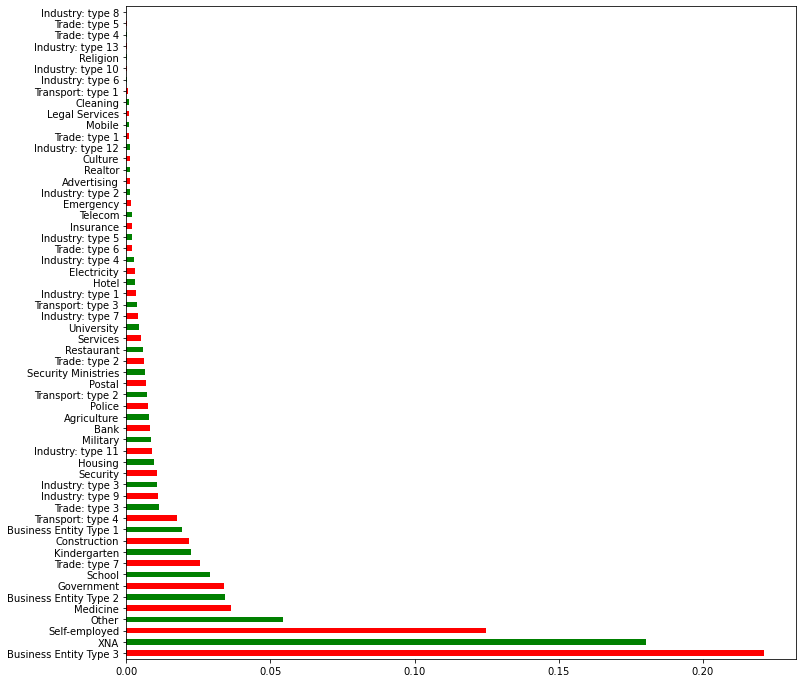

In [208]:
#plotting bar graph of the organization type
plt.figure(figsize=[12,12])
inp0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(color=['red','green'])

<AxesSubplot:xlabel='count', ylabel='TARGET'>

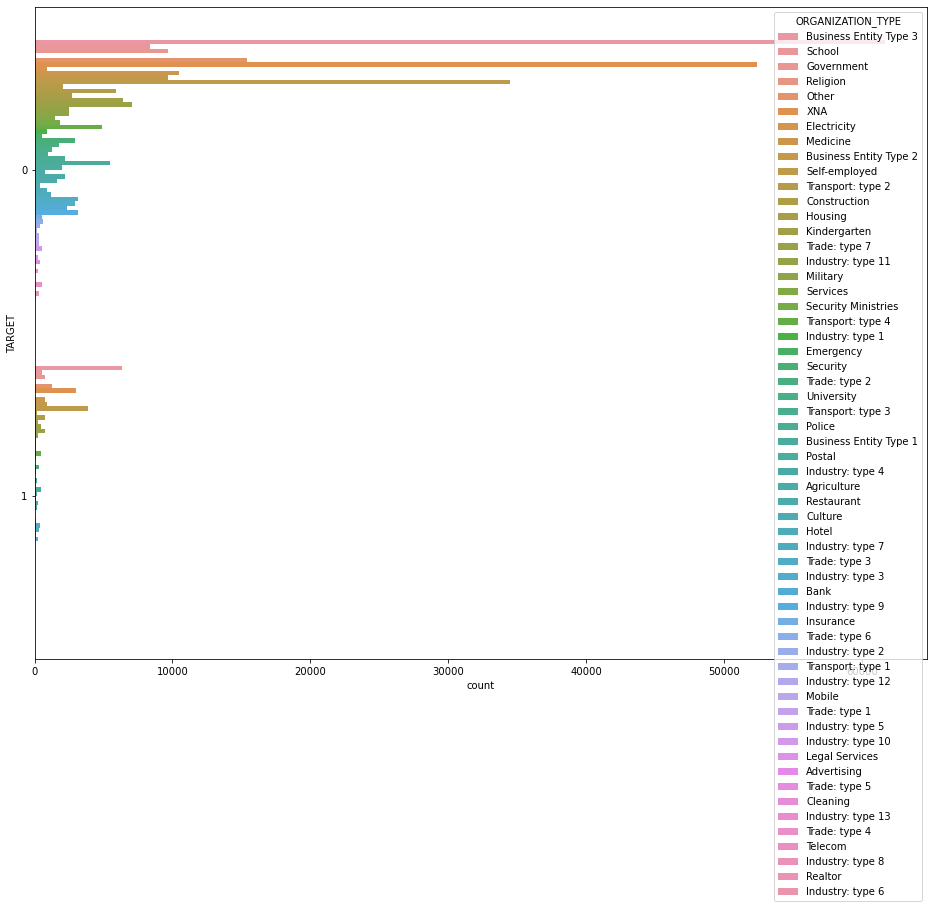

In [209]:
##Plotting data for target in terms of total count
plt.figure(figsize=[16,12])
sns.countplot(y=inp0.TARGET,hue=inp0.ORGANIZATION_TYPE)

-  People who works in business entity type 3 class or are self employed have applied most for the loan

#### NAME_EDUCATION_TYPE

In [210]:
#calculating the percentage of each education levels
inp0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710185
Higher education                 0.243457
Incomplete higher                0.033415
Lower secondary                  0.012410
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

Text(0.5, 1.0, 'Percentage of each educational categories among applicants')

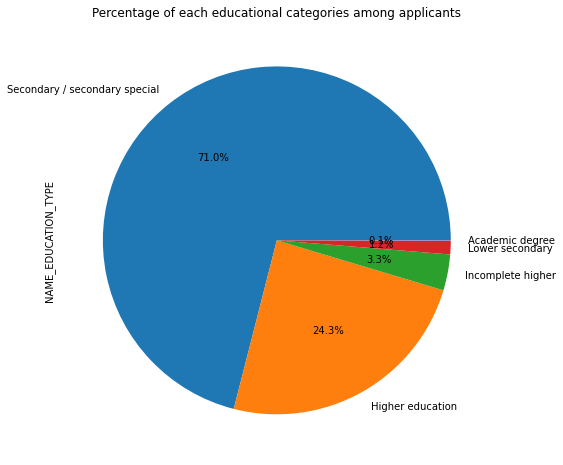

In [359]:
#plotting the pie chart of education categories
plt.figure(figsize=[8,8])
inp0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Percentage of each educational categories among applicants')

<AxesSubplot:xlabel='TARGET', ylabel='count'>

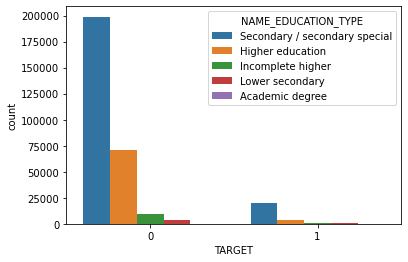

In [212]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.NAME_EDUCATION_TYPE)

- People with secondary/secondary special level education have applied the most for the loan, and the least is by people with academic degree/lower secondary level education.

#### FLAG_OWN_CAR

In [213]:
#calculating percentage of people with or without car
inp0.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659886
Y    0.340114
Name: FLAG_OWN_CAR, dtype: float64

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

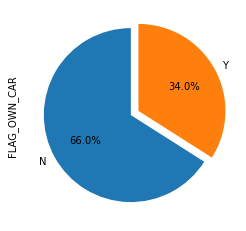

In [214]:
#plotting the result on a pie chart
explode=(0,.1)
inp0.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=explode,startangle=90)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

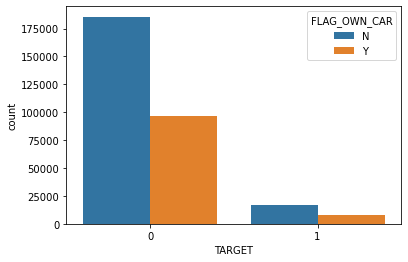

In [215]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.FLAG_OWN_CAR)

-  66% of the applicants own car

#### FLAG_OWN_REALTY

In [216]:
#calculating the percentage of people with or without realty
inp0.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693665
N    0.306335
Name: FLAG_OWN_REALTY, dtype: float64

<AxesSubplot:ylabel='FLAG_OWN_REALTY'>

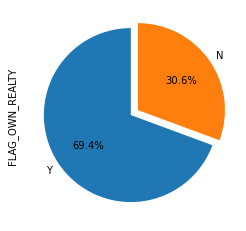

In [217]:
#plotting the results on a pie chart
explode=(0,.1)
inp0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=explode,startangle=90)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

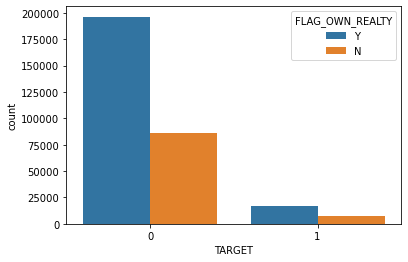

In [218]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.FLAG_OWN_REALTY)

-  69.4% of the applicants own realty

#### WEEKDAY_APPR_PROCESS_START- On which day of the week did the client apply for previous application

In [219]:
#calculating the percentage of each day 
inp0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

TUESDAY      0.175281
WEDNESDAY    0.168891
MONDAY       0.164917
THURSDAY     0.164514
FRIDAY       0.163691
SATURDAY     0.110085
SUNDAY       0.052621
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

<AxesSubplot:ylabel='WEEKDAY_APPR_PROCESS_START'>

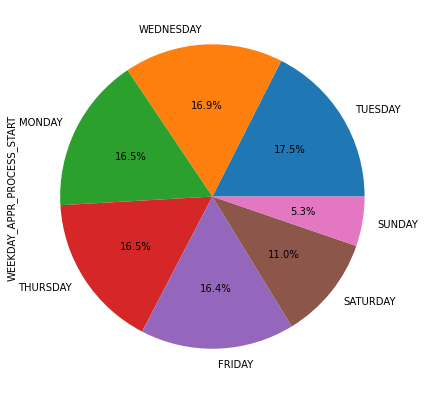

In [220]:
#plotting the result
plt.figure(figsize=[9,7])
inp0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='TARGET', ylabel='count'>

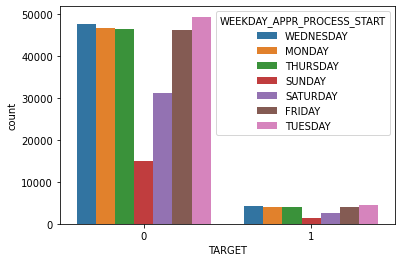

In [221]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.WEEKDAY_APPR_PROCESS_START)

-  17.5% the applicants had previously applied for loan on tuesday
-  all the other weekdays have nearly same percentage
-  Saturday and Sunday have least number of applications

#### OCCUPATION_TYPE

In [222]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261395
Sales staff              0.152053
Core staff               0.130591
Managers                 0.101228
Drivers                  0.088117
High skill tech staff    0.053904
Accountants              0.046481
Medicine staff           0.040433
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002492
Name: OCCUPATION_TYPE, dtype: float64

<AxesSubplot:>

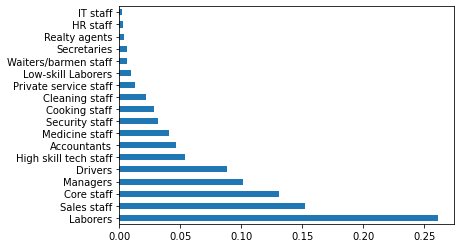

In [223]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()

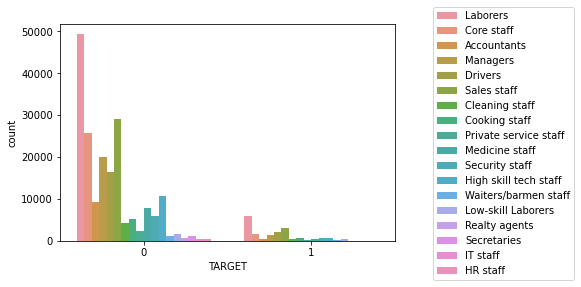

In [224]:
##Plotting data for target in terms of total count
sns.countplot(inp0.TARGET,hue=inp0.OCCUPATION_TYPE)
plt.legend(bbox_to_anchor=(1.1, 1.1))

- Above 50%of the loans are applied by Laborers,Sales staff and Core staff and the least is by IT & HR staffs

#### EMERGENCYSTATE_MODE

In [225]:
inp0.EMERGENCYSTATE_MODE.value_counts(normalize=True)

No     0.992429
Yes    0.007571
Name: EMERGENCYSTATE_MODE, dtype: float64

<AxesSubplot:ylabel='EMERGENCYSTATE_MODE'>

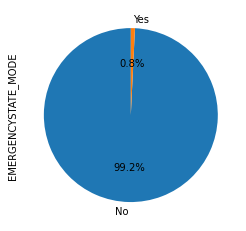

In [226]:

inp0.EMERGENCYSTATE_MODE.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',startangle=90)

# <font color='green'> 8.Finding top 10 correlations

In [227]:
# dividing the dataframe to two based on their traget value
target0=inp0[inp0.TARGET==0]
target1=inp0[inp0.TARGET==1]

In [228]:
#creating a correlation matrix 'corr' of all the numerical columns in target0
corr=target0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
SK_ID_CURR,1.000000,NaN,-0.000715,0.002091,-0.000353,0.000059,-0.000244,0.000367,0.000024,0.001479,...,0.000676,0.000832,-0.000486,-1.774606e-03,-0.001627,0.002296,-0.000040,0.000963,0.003843,1.313466e-03
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000715,NaN,1.000000,0.032340,0.003066,0.020890,-0.000570,-0.024368,-0.063021,-0.185796,...,0.001078,0.001302,-0.002983,1.454205e-04,0.001056,-0.000318,-0.007645,-0.004221,-0.035853,-3.369053e-01
AMT_INCOME_TOTAL,0.002091,NaN,0.032340,1.000000,0.412855,0.487797,0.418563,0.198577,0.036839,-0.078496,...,0.007994,0.001776,-0.001910,3.649692e-03,0.006296,0.010762,0.073582,0.024782,0.052890,-7.912700e-02
AMT_CREDIT,-0.000353,NaN,0.003066,0.412855,1.000000,0.771289,0.987025,0.100609,0.087549,-0.013464,...,0.021560,0.032151,-0.015603,-2.269530e-03,0.005133,0.000936,0.055055,0.021818,-0.037506,4.738961e-02
AMT_ANNUITY,0.000059,NaN,0.020890,0.487797,0.771289,1.000000,0.776420,0.120992,0.052524,-0.039421,...,0.004964,0.012735,-0.016528,3.217121e-03,0.002462,0.012378,0.036284,0.011652,-0.007991,-1.222375e-02
AMT_GOODS_PRICE,-0.000244,NaN,-0.000570,0.418563,0.987025,0.776420,1.000000,0.103831,0.088644,-0.015887,...,0.020776,0.032870,-0.013900,-1.699773e-03,0.005518,0.001189,0.056669,0.022130,-0.039759,4.464856e-02
REGION_POPULATION_RELATIVE,0.000367,NaN,-0.024368,0.198577,0.100609,0.120992,0.103831,1.000000,-0.008666,0.052085,...,0.002656,-0.000112,0.003275,-2.334225e-03,0.001629,-0.002814,0.071495,-0.001949,0.000161,2.533230e-02
DAYS_EMPLOYED,0.000024,NaN,-0.063021,0.036839,0.087549,0.052524,0.088644,-0.008666,1.000000,0.172097,...,-0.000128,-0.003786,-0.011889,3.174761e-03,-0.000869,0.001401,0.029429,0.002086,0.012135,3.524365e-01
DAYS_REGISTRATION,0.001479,NaN,-0.185796,-0.078496,-0.013464,-0.039421,-0.015887,0.052085,0.172097,1.000000,...,-0.004959,-0.007841,-0.003829,2.514991e-03,0.000010,0.001271,0.010882,0.000364,0.024282,3.330162e-01


In [229]:
#creating a mask
mask = np.zeros_like(corr)
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
mask.shape

(67, 67)

In [231]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Text(0.5, 1.0, 'Heat map of correlation matrix for Target=0')

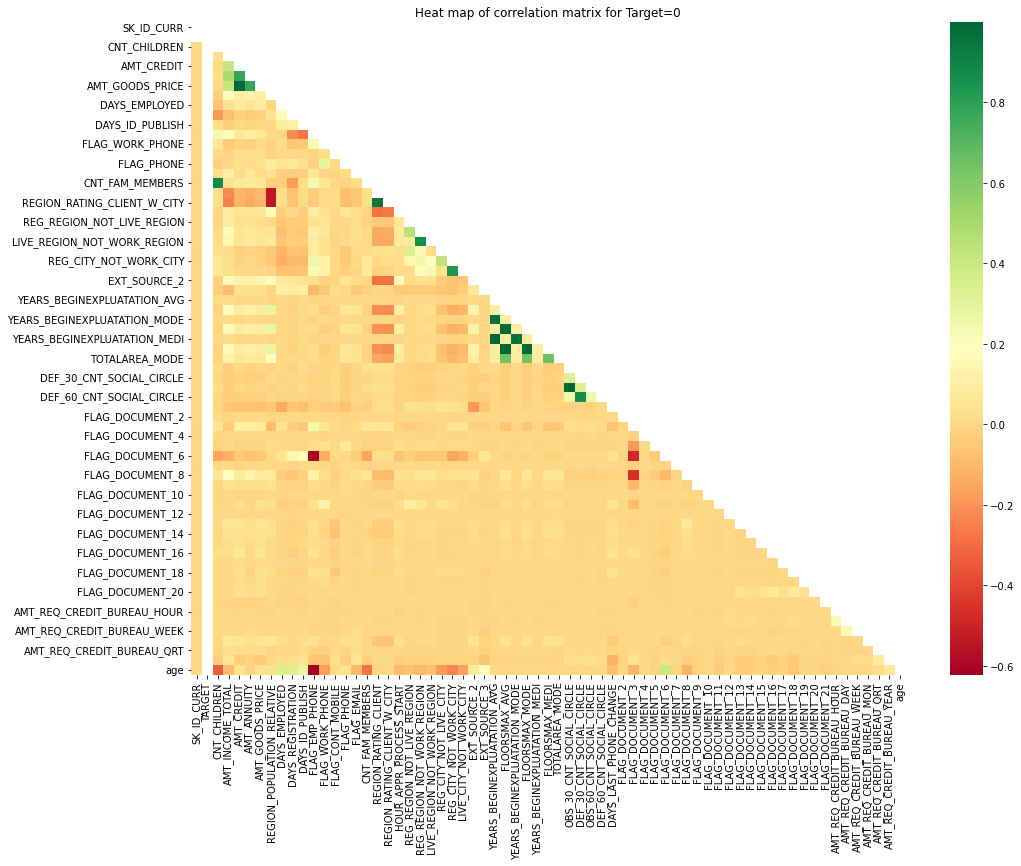

In [360]:
#plotting heatmap of corr 
plt.figure(figsize=[16,12])
sns.heatmap(corr,mask=mask,cmap='RdYlGn')
plt.title('Heat map of correlation matrix for Target=0')

- Here each dark green colored squares represents strong correlation between corresponding column and row of matrix.
- now let's try to find the top 10 correlations

# A.  Finding top 10 correlations in Target0

Since I am interested in top 10 correlations , I do not have to consider if it is positive correlaton or negative correlation.

In [233]:
#So using only the absolute values in correlation matrix
corr.abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
SK_ID_CURR,1.000000,NaN,0.000715,0.002091,0.000353,0.000059,0.000244,0.000367,0.000024,0.001479,...,0.000676,0.000832,0.000486,1.774606e-03,0.001627,0.002296,0.000040,0.000963,0.003843,1.313466e-03
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000715,NaN,1.000000,0.032340,0.003066,0.020890,0.000570,0.024368,0.063021,0.185796,...,0.001078,0.001302,0.002983,1.454205e-04,0.001056,0.000318,0.007645,0.004221,0.035853,3.369053e-01
AMT_INCOME_TOTAL,0.002091,NaN,0.032340,1.000000,0.412855,0.487797,0.418563,0.198577,0.036839,0.078496,...,0.007994,0.001776,0.001910,3.649692e-03,0.006296,0.010762,0.073582,0.024782,0.052890,7.912700e-02
AMT_CREDIT,0.000353,NaN,0.003066,0.412855,1.000000,0.771289,0.987025,0.100609,0.087549,0.013464,...,0.021560,0.032151,0.015603,2.269530e-03,0.005133,0.000936,0.055055,0.021818,0.037506,4.738961e-02
AMT_ANNUITY,0.000059,NaN,0.020890,0.487797,0.771289,1.000000,0.776420,0.120992,0.052524,0.039421,...,0.004964,0.012735,0.016528,3.217121e-03,0.002462,0.012378,0.036284,0.011652,0.007991,1.222375e-02
AMT_GOODS_PRICE,0.000244,NaN,0.000570,0.418563,0.987025,0.776420,1.000000,0.103831,0.088644,0.015887,...,0.020776,0.032870,0.013900,1.699773e-03,0.005518,0.001189,0.056669,0.022130,0.039759,4.464856e-02
REGION_POPULATION_RELATIVE,0.000367,NaN,0.024368,0.198577,0.100609,0.120992,0.103831,1.000000,0.008666,0.052085,...,0.002656,0.000112,0.003275,2.334225e-03,0.001629,0.002814,0.071495,0.001949,0.000161,2.533230e-02
DAYS_EMPLOYED,0.000024,NaN,0.063021,0.036839,0.087549,0.052524,0.088644,0.008666,1.000000,0.172097,...,0.000128,0.003786,0.011889,3.174761e-03,0.000869,0.001401,0.029429,0.002086,0.012135,3.524365e-01
DAYS_REGISTRATION,0.001479,NaN,0.185796,0.078496,0.013464,0.039421,0.015887,0.052085,0.172097,1.000000,...,0.004959,0.007841,0.003829,2.514991e-03,0.000010,0.001271,0.010882,0.000364,0.024282,3.330162e-01


In [234]:
#unstacking the values
corr.abs().unstack()

SK_ID_CURR  SK_ID_CURR                    1.000000
            TARGET                             NaN
            CNT_CHILDREN                  0.000715
            AMT_INCOME_TOTAL              0.002091
            AMT_CREDIT                    0.000353
                                            ...   
age         AMT_REQ_CREDIT_BUREAU_WEEK    0.003663
            AMT_REQ_CREDIT_BUREAU_MON     0.001985
            AMT_REQ_CREDIT_BUREAU_QRT     0.015386
            AMT_REQ_CREDIT_BUREAU_YEAR    0.073301
            age                           1.000000
Length: 4489, dtype: float64

In [235]:
#sorting the values and adding this to a new variable called C0
C0=corr.abs().unstack().sort_values(kind="quicksort").dropna()
C0

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              1.077120e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    1.077120e-07
age                         FLAG_DOCUMENT_10              6.077358e-07
FLAG_DOCUMENT_10            age                           6.077358e-07
FLAG_DOCUMENT_2             EXT_SOURCE_2                  1.172078e-06
                                                              ...     
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.000000e+00
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000e+00
FLOORSMAX_MEDI              FLOORSMAX_MEDI                1.000000e+00
age                         age                           1.000000e+00
Length: 4356, dtype: float64

In [236]:
#removing the records which has coefficient of correlation as 1 (correlation between same variables)
C0=C0[C0!=1]
C0

AMT_REQ_CREDIT_BUREAU_HOUR    FLAG_DOCUMENT_15               1.077120e-07
FLAG_DOCUMENT_15              AMT_REQ_CREDIT_BUREAU_HOUR     1.077120e-07
age                           FLAG_DOCUMENT_10               6.077358e-07
FLAG_DOCUMENT_10              age                            6.077358e-07
FLAG_DOCUMENT_2               EXT_SOURCE_2                   1.172078e-06
                                                                 ...     
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG    9.936865e-01
FLOORSMAX_MEDI                FLOORSMAX_AVG                  9.972531e-01
FLOORSMAX_AVG                 FLOORSMAX_MEDI                 9.972531e-01
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE       9.985102e-01
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE       9.985102e-01
Length: 4290, dtype: float64

In [237]:
#sorting and looking at first 20 correlations  (contains var1~var2 and var2~var1)
C0.sort_values(ascending=False).head(20)

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998510
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998510
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997253
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997253
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993686
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993686
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988957
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988957
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987025
AMT_GOODS_PRICE               AMT_CREDIT                      0.987025
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986571
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986571
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971331
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971331
YEARS_

### Top 10 correlation (in target0)

1. OBS_30_CNT_SOCIAL_CIRCLE~OBS_60_CNT_SOCIAL_CIRCLE
2. FLOORSMAX_AVG                 ~FLOORSMAX_MEDI
3. YEARS_BEGINEXPLUATATION_MEDI  ~YEARS_BEGINEXPLUATATION_AVG
4. FLOORSMAX_MODE                ~FLOORSMAX_MEDI
5. AMT_CREDIT                    ~AMT_GOODS_PRICE
6. FLOORSMAX_AVG                 ~FLOORSMAX_MODE
7. YEARS_BEGINEXPLUATATION_AVG   ~YEARS_BEGINEXPLUATATION_MODE
8. YEARS_BEGINEXPLUATATION_MEDI  ~YEARS_BEGINEXPLUATATION_MODE
9. REGION_RATING_CLIENT          ~REGION_RATING_CLIENT_W_CITY
10. CNT_CHILDREN                  ~CNT_FAM_MEMBERS 

# b. Finding top 10 correlations in Target1

In [238]:
#creating a correlation matrix 'corr1' of all the numerical columns in target1
corr1=target1.corr()
corr1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
SK_ID_CURR,1.000000,NaN,-0.005144,-0.002307,-0.001290,-0.007578,-0.001814,0.006301,-0.000376,-0.006342,...,-0.006382,0.003781,0.006932,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843,0.001160
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,-0.000575,-0.001675,0.031257,-0.008111,-0.031975,-0.032627,-0.149154,...,-0.001370,-0.002395,0.001136,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253,-0.259222
AMT_INCOME_TOTAL,-0.002307,NaN,-0.000575,1.000000,0.351708,0.428008,0.352954,0.120684,0.031816,-0.039894,...,-0.001872,-0.002572,-0.004424,0.013516,0.004607,0.018588,0.072082,0.032556,0.076366,0.000697
AMT_CREDIT,-0.001290,NaN,-0.001675,0.351708,1.000000,0.752195,0.982783,0.069161,0.106003,0.025854,...,0.013442,0.016949,-0.021964,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698,0.135070
AMT_ANNUITY,-0.007578,NaN,0.031257,0.428008,0.752195,1.000000,0.752295,0.071690,0.049032,-0.034279,...,-0.001563,-0.001466,-0.029489,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819,0.014028
AMT_GOODS_PRICE,-0.001814,NaN,-0.008111,0.352954,0.982783,0.752295,1.000000,0.076053,0.111886,0.025661,...,0.012182,0.016241,-0.019760,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811,0.135532
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.120684,0.069161,0.071690,0.076053,1.000000,0.015758,0.056222,...,-0.002781,0.000954,0.006929,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198,0.047956
DAYS_EMPLOYED,-0.000376,NaN,-0.032627,0.031816,0.106003,0.049032,0.111886,0.015758,1.000000,0.137454,...,-0.007738,0.006734,-0.013045,-0.007059,0.007546,0.012194,0.028851,-0.007965,0.034267,0.306726
DAYS_REGISTRATION,-0.006342,NaN,-0.149154,-0.039894,0.025854,-0.034279,0.025661,0.056222,0.137454,1.000000,...,-0.002992,0.003482,-0.002806,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572,0.289116


Text(0.5, 1.0, 'Heat map of correlation matrix for Target=1')

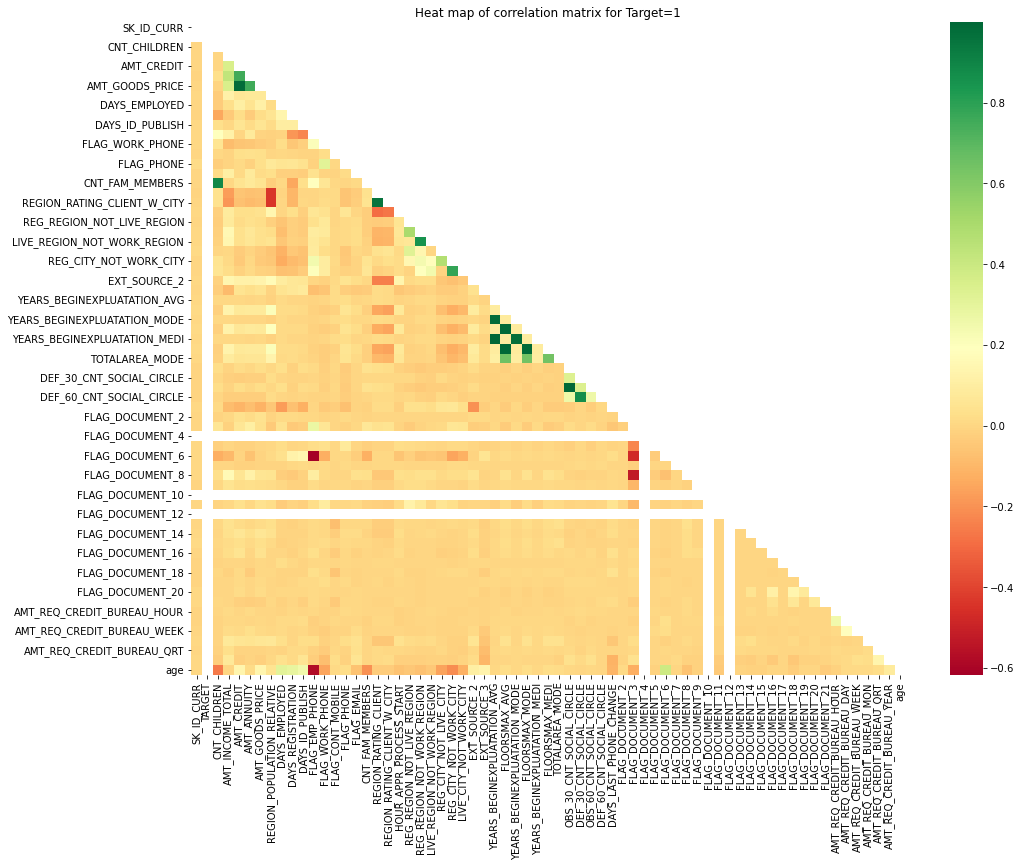

In [361]:
#plotting heatmap of corr1
plt.figure(figsize=[16,12])
sns.heatmap(corr1,mask=mask,cmap='RdYlGn')
plt.title('Heat map of correlation matrix for Target=1')

- Here each dark green colored squares represents strong correlation between corresponding column and row of matrix.
- now let's try to find the top 10 correlations

Since I am interested in top 10 correlations , I do not have to consider if it is positive correlaton or negative correlation.

In [240]:
pd.set_option('display.max_columns',500)

In [241]:
#so I am using only the absolute values in matrix
corr1.abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
SK_ID_CURR,1.000000,NaN,0.005144,0.002307,0.001290,0.007578,0.001814,0.006301,0.000376,0.006342,0.002539,0.005248,0.004970,0.003039,0.018246,0.000831,0.003816,0.005936,0.004135,0.005004,0.004249,0.004120,0.004303,0.008328,0.000787,0.002929,0.006388,0.004144,0.003510,0.011749,0.004568,0.010260,0.003867,0.011782,0.005621,0.009424,0.005567,0.009087,0.009440,0.002455,0.002291,0.004640,NaN,0.002669,0.003320,0.002342,0.003887,0.005247,NaN,0.003634,NaN,0.001685,0.001327,0.007977,0.000704,0.005428,0.009181,0.006382,0.003781,0.006932,0.011106,0.007388,0.003075,0.005180,0.001614,0.006843,0.001160
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.005144,NaN,1.000000,0.000575,0.001675,0.031257,0.008111,0.031975,0.032627,0.149154,0.032299,0.192469,0.051712,0.003592,0.024306,0.013902,0.885484,0.040680,0.043185,0.023899,0.024322,0.020793,0.012073,0.001174,0.046115,0.053515,0.012090,0.024512,0.003715,0.021437,0.003436,0.020306,0.003555,0.021101,0.017176,0.025909,0.001520,0.025285,0.005039,0.011547,0.007779,0.060561,NaN,0.022138,0.129482,0.001895,0.028766,0.003591,NaN,0.007550,NaN,0.001663,0.002932,0.004800,0.001079,0.005500,0.004333,0.001370,0.002395,0.001136,0.000316,0.011255,0.009316,0.008852,0.013029,0.027253,0.259222
AMT_INCOME_TOTAL,0.002307,NaN,0.000575,1.000000,0.351708,0.428008,0.352954,0.120684,0.031816,0.039894,0.002051,0.118691,0.083663,0.006870,0.007180,0.102755,0.006927,0.173909,0.189198,0.083601,0.082342,0.155880,0.142675,0.003598,0.013622,0.021108,0.143162,0.089388,0.007027,0.129070,0.005916,0.122710,0.006976,0.127901,0.088555,0.006516,0.023857,0.005836,0.024251,0.084094,0.002662,0.011743,NaN,0.002096,0.095577,0.004610,0.160805,0.046237,NaN,0.002724,NaN,0.040079,0.037173,0.018298,0.021362,0.002882,0.015228,0.001872,0.002572,0.004424,0.013516,0.004607,0.018588,0.072082,0.032556,0.076366,0.000697
AMT_CREDIT,0.001290,NaN,0.001675,0.351708,1.000000,0.752195,0.982783,0.069161,0.106003,0.025854,0.052329,0.000660,0.059601,0.031771,0.008608,0.010157,0.051224,0.059193,0.071377,0.031782,0.019540,0.033260,0.033554,0.033034,0.037720,0.016509,0.120028,0.048141,0.003513,0.072742,0.000530,0.070423,0.002859,0.072586,0.055764,0.019856,0.025503,0.020242,0.030461,0.110851,0.034225,0.061629,NaN,0.012192,0.005333,0.012227,0.056351,0.025318,NaN,0.037012,NaN,0.018148,0.063136,0.026399,0.046752,0.000694,0.011174,0.013442,0.016949,0.021964,0.003771,0.004346,0.010598,0.056227,0.007201,0.020698,0.135070
AMT_ANNUITY,0.007578,NaN,0.031257,0.428008,0.752195,1.000000,0.752295,0.071690

In [242]:
#unstacking the values
corr1.abs().unstack()

SK_ID_CURR  SK_ID_CURR                    1.000000
            TARGET                             NaN
            CNT_CHILDREN                  0.005144
            AMT_INCOME_TOTAL              0.002307
            AMT_CREDIT                    0.001290
                                            ...   
age         AMT_REQ_CREDIT_BUREAU_WEEK    0.008437
            AMT_REQ_CREDIT_BUREAU_MON     0.010905
            AMT_REQ_CREDIT_BUREAU_QRT     0.022994
            AMT_REQ_CREDIT_BUREAU_YEAR    0.083902
            age                           1.000000
Length: 4489, dtype: float64

In [243]:
#sorting the values and adding this to a new variable called C1
C1=corr1.abs().unstack().sort_values(kind="quicksort").dropna()
C1

REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_REQ_CREDIT_BUREAU_DAY    FLAG_DOCUMENT_16               0.000016
                                                              ...   
DEF_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       1.000000
TOTALAREA_MODE               TOTALAREA_MODE                 1.000000
FLOORSMAX_MODE               FLOORSMAX_MODE                 1.000000
age                          age                            1.000000
Length: 3969, dtype: float64

In [244]:
#removing the records which has coefficient of correlation as 1 (correlation between same variables)
C1=C1[C1!=1]
C1

REGION_RATING_CLIENT          FLAG_DOCUMENT_20               0.000010
FLAG_DOCUMENT_20              REGION_RATING_CLIENT           0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_REQ_CREDIT_BUREAU_DAY     FLAG_DOCUMENT_16               0.000016
                                                               ...   
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG    0.996125
FLOORSMAX_AVG                 FLOORSMAX_MEDI                 0.997295
FLOORSMAX_MEDI                FLOORSMAX_AVG                  0.997295
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE       0.998270
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE       0.998270
Length: 3906, dtype: float64

In [245]:
#sorting and looking at first 20 correlations  (contains var1~var2 and var2~var1)
C1.sort_values(ascending=False).head(20)

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997295
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989472
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989472
                              FLOORSMAX_AVG                   0.986935
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986935
AMT_CREDIT                    AMT_GOODS_PRICE                 0.982783
AMT_GOODS_PRICE               AMT_CREDIT                      0.982783
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980474
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980474
      

### Top 10 correlations (in target1)

1. OBS_30_CNT_SOCIAL_CIRCLE      ~OBS_60_CNT_SOCIAL_CIRCLE
2. FLOORSMAX_MEDI                ~FLOORSMAX_AVG 
3. YEARS_BEGINEXPLUATATION_MEDI  ~YEARS_BEGINEXPLUATATION_AVG
4. FLOORSMAX_MEDI                ~FLOORSMAX_MODE 
5. FLOORSMAX_AVG                 ~FLOORSMAX_MODE
6. AMT_CREDIT                    ~AMT_GOODS_PRICE
7. YEARS_BEGINEXPLUATATION_AVG   ~YEARS_BEGINEXPLUATATION_MODE
8. YEARS_BEGINEXPLUATATION_MEDI  ~YEARS_BEGINEXPLUATATION_MODE
9. REGION_RATING_CLIENT          ~REGION_RATING_CLIENT_W_CITY
10. CNT_CHILDREN                 ~CNT_FAM_MEMBERS

# <font color='green'>9. Bi/multi variate analysis

#### Correlation of Target with respect to boolean columns

In [246]:
# we had stored columns containing boolean data as 0 or 1
bool

['TARGET',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [247]:
#let's check the correlation between target and these boolean columns

In [248]:
inp0[bool].corrwith(inp0.TARGET)

TARGET              1.000000
FLAG_EMP_PHONE      0.045987
FLAG_WORK_PHONE     0.028540
FLAG_CONT_MOBILE    0.000371
FLAG_PHONE         -0.023795
FLAG_EMAIL         -0.001761
FLAG_DOCUMENT_2     0.005417
FLAG_DOCUMENT_3     0.044334
FLAG_DOCUMENT_4    -0.002672
FLAG_DOCUMENT_5    -0.000293
FLAG_DOCUMENT_6    -0.028602
FLAG_DOCUMENT_7    -0.001463
FLAG_DOCUMENT_8    -0.008040
FLAG_DOCUMENT_9    -0.004339
FLAG_DOCUMENT_10   -0.001414
FLAG_DOCUMENT_11   -0.004230
FLAG_DOCUMENT_12   -0.000756
FLAG_DOCUMENT_13   -0.011584
FLAG_DOCUMENT_14   -0.009464
FLAG_DOCUMENT_15   -0.006536
FLAG_DOCUMENT_16   -0.011616
FLAG_DOCUMENT_17   -0.003378
FLAG_DOCUMENT_18   -0.007944
FLAG_DOCUMENT_19   -0.001358
FLAG_DOCUMENT_20    0.000215
FLAG_DOCUMENT_21    0.003708
dtype: float64

- Looking at the Correalation of target with respect to boolean columns,it is evident that these bool variables have low impact on the loan defaulters

## Numeric-numeric analysis

#### CNT_CHILDREN ~CNT_FAM_MEMBERS

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='CNT_FAM_MEMBERS'>

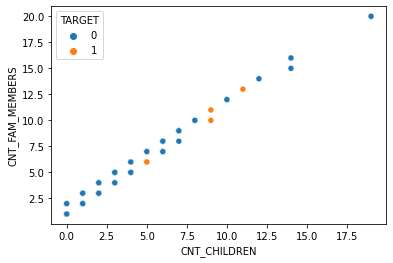

In [249]:
sns.scatterplot(inp0.CNT_CHILDREN,inp0.CNT_FAM_MEMBERS,hue=inp0.TARGET)

In [250]:
inp0[['CNT_CHILDREN']].corrwith(inp0.CNT_FAM_MEMBERS)

CNT_CHILDREN    0.879164
dtype: float64

- The applicant's family size and the number of children have a strong positive correlation
- As the family size/ Number of children increases the chances of loan defaulting increases

#### AMT_CREDIT ~AMT_GOODS_PRICE

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

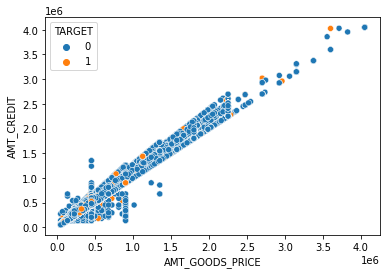

In [251]:
sns.scatterplot(inp0.AMT_GOODS_PRICE,inp0.AMT_CREDIT,hue=inp0.TARGET)

In [252]:
inp0[['AMT_GOODS_PRICE']].corrwith(inp0.AMT_CREDIT)

AMT_GOODS_PRICE    0.986737
dtype: float64

- The amount of loan taken increases with the goods price amount


#### CNT_FAM_MEMBERS~AMT_CREDIT

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='AMT_CREDIT'>

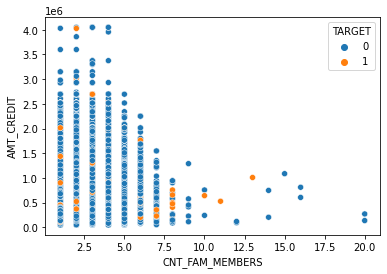

In [253]:
sns.scatterplot(inp0.CNT_FAM_MEMBERS,inp0.AMT_CREDIT,hue=inp0.TARGET)

In [254]:
inp0[['CNT_FAM_MEMBERS']].corrwith(inp0.AMT_CREDIT)

CNT_FAM_MEMBERS    0.063141
dtype: float64

- No general pattern between the variables

#### AMT_INCOME_TOTAL~AMT_CREDIT

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

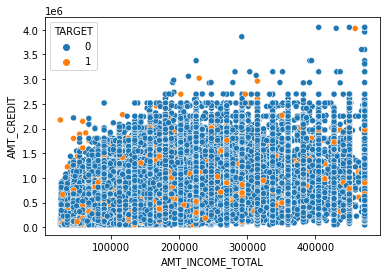

In [255]:
sns.scatterplot(inp0.AMT_INCOME_TOTAL,inp0.AMT_CREDIT,hue=inp0.TARGET)

In [256]:
inp0[['AMT_INCOME_TOTAL']].corrwith(inp0.AMT_CREDIT)

AMT_INCOME_TOTAL    0.409298
dtype: float64

- As the income of the applicant increases, the credit amount also increases slightly.
- But here we can not see any general pattern among people who default

#### EXT_SOURCE_2 ~EXT_SOURCE_3

<AxesSubplot:xlabel='EXT_SOURCE_2', ylabel='EXT_SOURCE_3'>

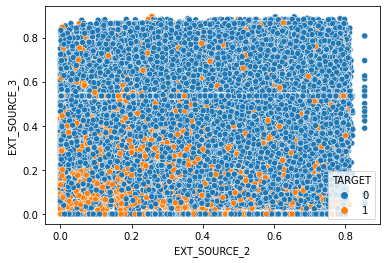

In [257]:
sns.scatterplot(inp0.EXT_SOURCE_2,inp0.EXT_SOURCE_3,hue=inp0.TARGET)

In [258]:
inp0[['EXT_SOURCE_2']].corrwith(inp0.EXT_SOURCE_3)

EXT_SOURCE_2    0.094147
dtype: float64

- The correlation between two external scores are not strong
- However we could see that most of the people who had difficulty in repaying the amount have low external scores.

#### AMT_ANNUITY~AMT_CREDIT

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

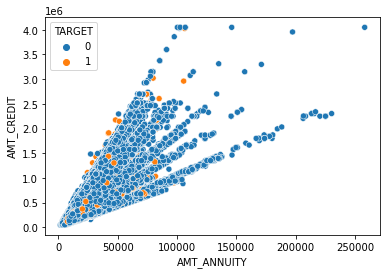

In [259]:
sns.scatterplot(inp0.AMT_ANNUITY,inp0.AMT_CREDIT,hue=inp0.TARGET)

In [260]:
inp0[['AMT_ANNUITY']].corrwith(inp0.AMT_CREDIT)

AMT_ANNUITY    0.77012
dtype: float64

- As the loan annuity increases the credit amount also increases

# numeric cat   ##3

#### AMT_CREDIT vs Target

In [261]:
#groupby the Target to find the mean of the credi amount with target 0 & 1 seperatly.
inp0.groupby('TARGET')['AMT_CREDIT'].mean()  #not much of diff, however mean is influenced, so let's look at median

TARGET
0    602662.469737
1    557778.527674
Name: AMT_CREDIT, dtype: float64

In [262]:
#groupby the Target to find the median of the credit amount with target 0 & 1 seperatly.
inp0.groupby('TARGET')['AMT_CREDIT'].median()  

TARGET
0    517788.0
1    497520.0
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

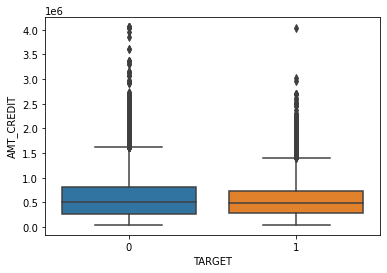

In [263]:
#plot the box plot of credit amount for defulaters and non defaulters
sns.boxplot(data=inp0,x='TARGET',y='AMT_CREDIT')

#### AMT_INCOME_TOTAL vs TARGET

In [264]:
#groupby the Target to find the mean of the income with target 0 & 1 seperatly.
inp0.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()  #not much of diff, however mean is influenced, so let's look at median

TARGET
0    166601.368853
1    159497.289607
Name: AMT_INCOME_TOTAL, dtype: float64

In [265]:
#groupby the Target to find the median of the income amount with target 0 & 1 seperatly.
inp0.groupby('TARGET')['AMT_INCOME_TOTAL'].median()  

TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

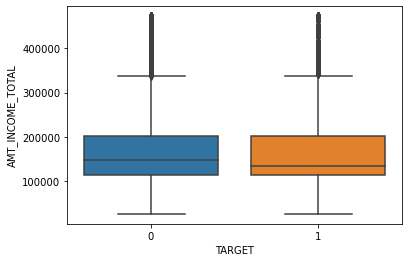

In [266]:
#plot the box plot of income amount for defulaters and non defaulters
sns.boxplot(data=inp0,x='TARGET',y='AMT_INCOME_TOTAL')

#### EXT_SOURCE_2 VS TARGET

In [267]:
#groupby the Target to find the mean of the external score 2 with target 0 & 1 seperatly.
inp0.groupby('TARGET')['EXT_SOURCE_2'].mean()  

TARGET
0    0.523571
1    0.411260
Name: EXT_SOURCE_2, dtype: float64

In [268]:
#groupby the Target to find the median of the external score 2 with target 0 & 1 seperatly.
inp0.groupby('TARGET')['EXT_SOURCE_2'].median()  

TARGET
0    0.573402
1    0.441076
Name: EXT_SOURCE_2, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='EXT_SOURCE_2'>

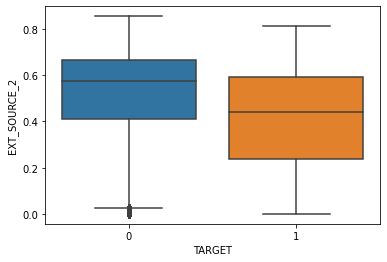

In [269]:
#plot the box plot of external score 2 for defulaters and non defaulters
sns.boxplot(data=inp0,x='TARGET',y='EXT_SOURCE_2')

In [270]:
#function to find the 25th percentile.
def p25(x):
    return np.quantile(x, 0.25)

In [271]:
#calculate the mean, median and 25th percentile of external score with target
inp0.groupby('TARGET')['EXT_SOURCE_2'].aggregate(['mean','median',p25])

,mean,median,p25
TARGET,,,
0,0.523571,0.573402,0.410343
1,0.411260,0.441076,0.239084


<AxesSubplot:xlabel='TARGET'>

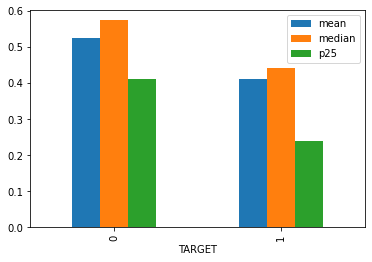

In [272]:
inp0.groupby('TARGET')['EXT_SOURCE_2'].aggregate(['mean','median',p25]).plot.bar()

EXT_SOURCE_3 VS target

In [273]:
#groupby the Target to find the mean of the external score 3 with target 0 & 1 seperatly.
inp0.groupby('TARGET')['EXT_SOURCE_3'].mean()  

TARGET
0    0.523770
1    0.423775
Name: EXT_SOURCE_3, dtype: float64

In [274]:
#groupby the Target to find the median of the external score 3 with target 0 & 1 seperatly.
inp0.groupby('TARGET')['EXT_SOURCE_3'].median()  

TARGET
0    0.535276
1    0.475850
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='EXT_SOURCE_3'>

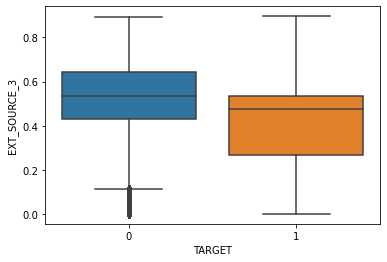

In [275]:
#plot the box plot of external score 3 for defulaters and non defaulters
sns.boxplot(data=inp0,x='TARGET',y='EXT_SOURCE_3')

In [276]:
#calculate the mean, median and 25th percentile of external score 3 with target
inp0.groupby('TARGET')['EXT_SOURCE_3'].aggregate(['mean','median',p25])

,mean,median,p25
TARGET,,,
0,0.523770,0.535276,0.431192
1,0.423775,0.475850,0.269286


<AxesSubplot:xlabel='TARGET'>

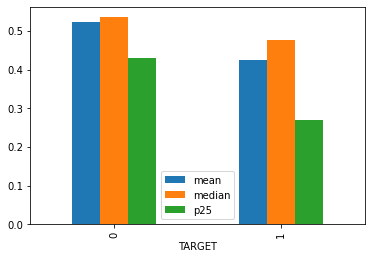

In [277]:
inp0.groupby('TARGET')['EXT_SOURCE_3'].aggregate(['mean','median',p25]).plot.bar()

NAME_FAMILY_STATUS vsAMT_CREDIT

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='AMT_CREDIT'>

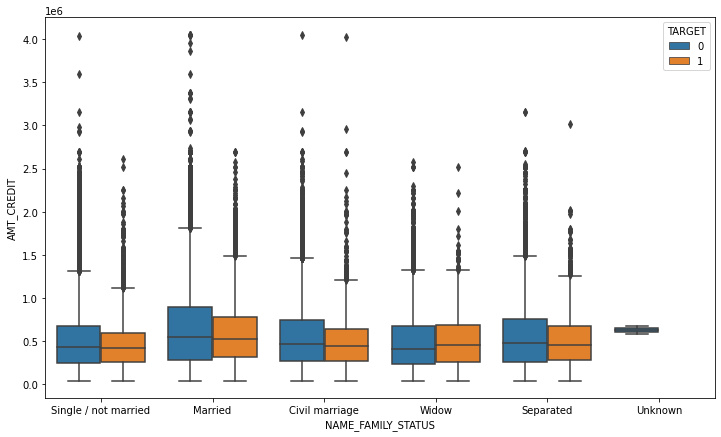

In [278]:
plt.figure(figsize=(12,7))
sns.boxplot(data=inp0,x="NAME_FAMILY_STATUS",y="AMT_CREDIT",hue="TARGET")



#### categorical-categorical analysis

In [279]:
inp0.TARGET.value_counts(normalize=True)

0    0.919268
1    0.080732
Name: TARGET, dtype: float64

In [280]:
inp0.TARGET.mean() #same as percentage above for defaulters

0.08073170731707317

#### Mean of Target value and the percentage of TARGET=1 are same, so mean of TARGET  can be used to check the likelihood of defaulting in different categories

In [281]:
#calculate the mean of TARGET with different WEEKDAY_APPR_PROCESS_START categories.
inp0.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean()

WEEKDAY_APPR_PROCESS_START
FRIDAY       0.081474
MONDAY       0.077575
SATURDAY     0.078875
SUNDAY       0.079291
THURSDAY     0.081007
TUESDAY      0.083508
WEDNESDAY    0.081604
Name: TARGET, dtype: float64

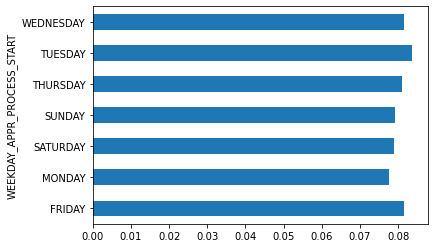

In [282]:
#plot the bar graph of WEEKDAY_APPR_PROCESS_START with average value of TARGET
inp0.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().plot.barh()
plt.show()

In [365]:
#calculate the mean of TARGET with different CODE_GENDER categories.
inp0.groupby('CODE_GENDER')['TARGET'].mean()

CODE_GENDER
F    0.069994
M    0.101423
Name: TARGET, dtype: float64

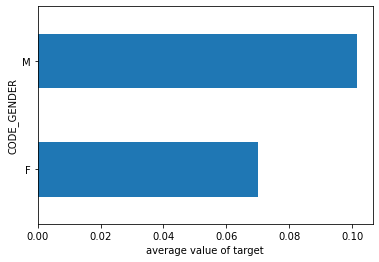

In [367]:
#plot the bar graph of CODE_GENDER with average value of TARGET
inp0.groupby('CODE_GENDER')['TARGET'].mean().plot.barh()
plt.xlabel('average value of target')
plt.show()

#### NAME_HOUSING_TYPE VS taregt

In [285]:
#calculate the mean of TARGET with different NAME_HOUSING_TYPE categories.
inp0.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()

NAME_HOUSING_TYPE
Co-op apartment        0.079323
House / apartment      0.077960
Municipal apartment    0.085405
Office apartment       0.065724
Rented apartment       0.123131
With parents           0.116981
Name: TARGET, dtype: float64

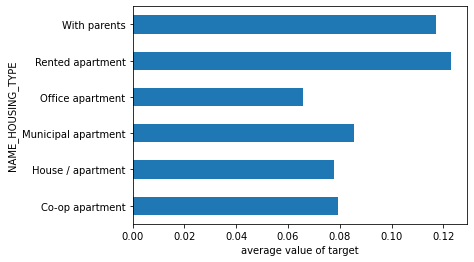

In [368]:
#plot the bar graph of NAME_HOUSING_TYPE with average value of TARGET
inp0.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot.barh()
plt.xlabel('average value of target')
plt.show()

OCCUPATION_TYPE vs TARGET

In [287]:
#calculate the mean of TARGET with different OCCUPATION_TYPE categories.
inp0.groupby('OCCUPATION_TYPE')['TARGET'].mean()

OCCUPATION_TYPE
Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.105790
Low-skill Laborers       0.171524
Managers                 0.062140
Medicine staff           0.067010
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096321
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64

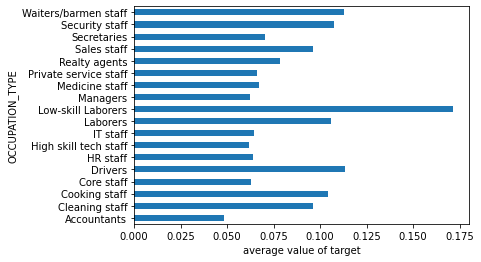

In [369]:
#plot the bar graph of OCCUPATION_TYPE with average value of TARGET
inp0.groupby('OCCUPATION_TYPE')['TARGET'].mean().plot.barh()
plt.xlabel('average value of target')
plt.show()

NAME_CONTRACT_TYPE vs TARGET

In [289]:
#calculate the mean of TARGET with different NAME_CONTRACT_TYPE categories.
inp0.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054802
Name: TARGET, dtype: float64

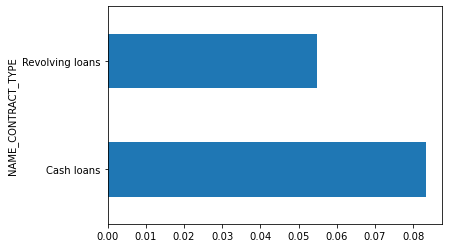

In [290]:
#plot the bar graph of NAME_CONTRACT_TYPE with average value of TARGET
inp0.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot.barh()
plt.show()

ORGANIZATION_TYPE VS TARGET

In [291]:
#calculate the mean of TARGET with different ORGANIZATION_TYPE categories.
inp0.groupby('ORGANIZATION_TYPE')['TARGET'].mean()

ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081384
Business Entity Type 2    0.085292
Business Entity Type 3    0.093000
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069781
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.037940
Industry: type 13         0.134328
Industry: type 2          0.072052
Industry: type 3          0.106162
Industry: type 4          0.101482
Industry: type 5          0.068447
Industry: type 6          0.071429
Industry: type 7          0.080337
Industry: type 8          0.125000
Industry: type 9          0.066825
Insurance                 0.056951
Ki

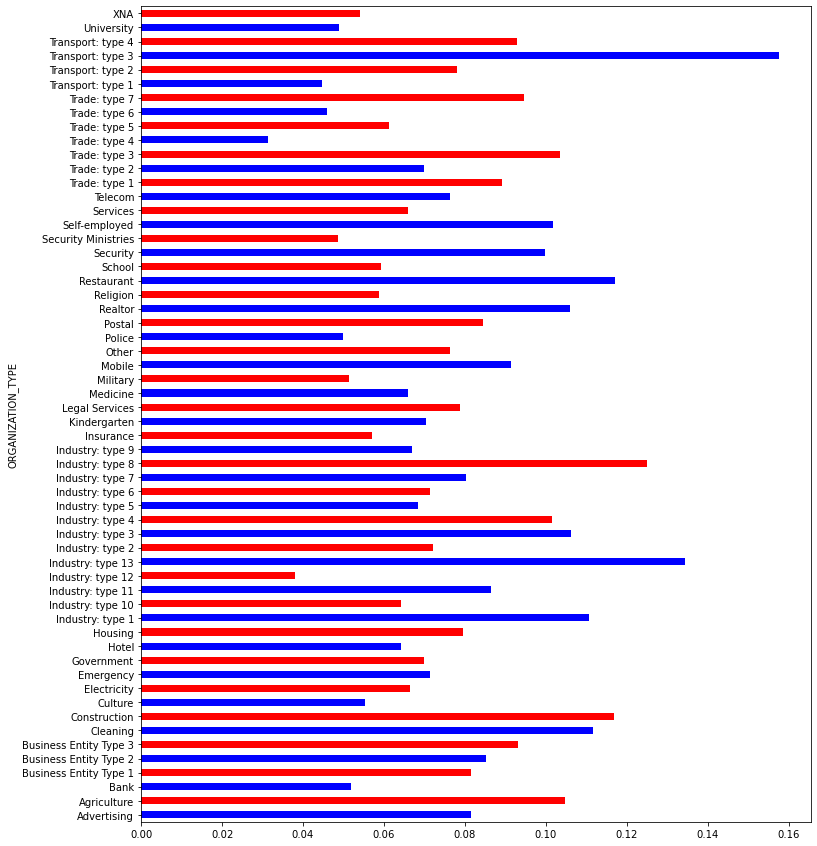

In [292]:
#plot the bar graph of ORGANIZATION_TYPE with average value of TARGET
plt.figure(figsize=[12,15])
inp0.groupby('ORGANIZATION_TYPE')['TARGET'].mean().plot.barh(color=['blue','red'])
plt.show()

PEOPLE WHO WORKS AT TRANSPORT: TYPE 3 ARE MORE LIKELY TO DEFAULT

FLAG_OWN_CAR VS TARGET

In [293]:
#calculate the mean of TARGET with different FLAG_OWN_CAR categories.
inp0.groupby('FLAG_OWN_CAR')['TARGET'].mean()

FLAG_OWN_CAR
N    0.085006
Y    0.072439
Name: TARGET, dtype: float64

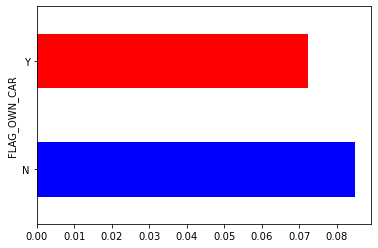

In [294]:
#plot the bar graph of FLAG_OWN_CAR with average value of TARGET

inp0.groupby('FLAG_OWN_CAR')['TARGET'].mean().plot.barh(color=['blue','red'])
plt.show()

NAME_INCOME_TYPE vs TARGET

In [295]:
#calculate the mean of TARGET with different NAME_INCOME_TYPE categories.
inp0.groupby('NAME_INCOME_TYPE')['TARGET'].mean()

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053873
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

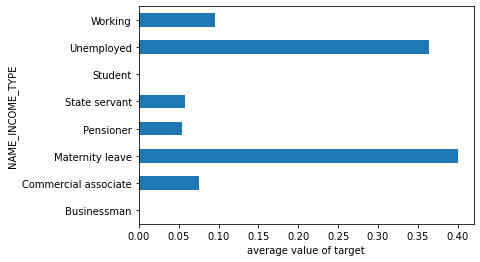

In [370]:
#plot the bar graph of NAME_INCOME_TYPE with average value of TARGET

inp0.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.barh()
plt.xlabel('average value of target')
plt.show()

NAME_EDUCATION_TYPE v TARGET

In [297]:
#calculate the mean of TARGET with different NAME_EDUCATION_TYPE categories.
inp0.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084866
Lower secondary                  0.109277
Secondary / secondary special    0.089403
Name: TARGET, dtype: float64

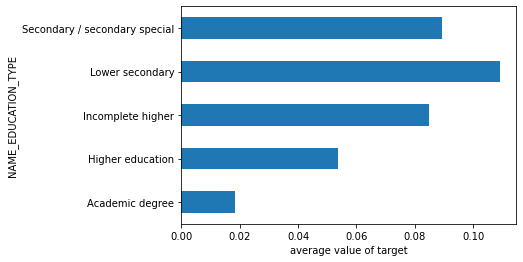

In [371]:
#plot the bar graph of NAME_EDUCATION_TYPE with average value of TARGET

inp0.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.barh()
plt.xlabel('average value of target')
plt.show()

In [299]:
#calculate the mean of TARGET with different EMERGENCYSTATE_MODE categories.
inp0.groupby('EMERGENCYSTATE_MODE')['TARGET'].mean()

EMERGENCYSTATE_MODE
No     0.080617
Yes    0.095790
Name: TARGET, dtype: float64

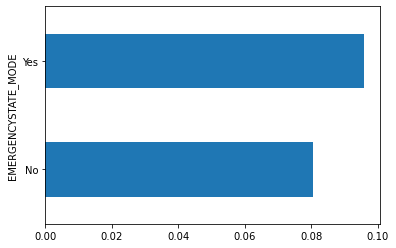

In [300]:
#plot the bar graph of EMERGENCYSTATE_MODE with average value of TARGET

inp0.groupby('EMERGENCYSTATE_MODE')['TARGET'].mean().plot.barh()
plt.show()

In [301]:
#calculate the mean of TARGET with different NAME_FAMILY_STATUS categories.
inp0.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.099453
Married                 0.075600
Separated               0.081951
Single / not married    0.098079
Unknown                 0.000000
Widow                   0.058249
Name: TARGET, dtype: float64

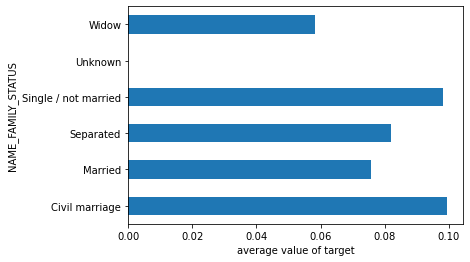

In [372]:
#plot the bar graph of NAME_FAMILY_STATUS with average value of TARGET

inp0.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.barh()
plt.xlabel('average value of target')
plt.show()

AGE VS target

<AxesSubplot:xlabel='TARGET', ylabel='age'>

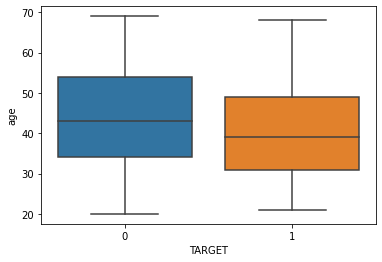

In [303]:
#plot the boxplot of age with TARGET
sns.boxplot(data=inp0,x='TARGET',y='age')

##### making buckets from age columns 

In [304]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp0['age_grp']=pd.cut(inp0.age,[0,30,40,50,60,999],labels=['<30','30-40','40-50','50-60','>60'])
inp0.age_grp.head()

0      <30
1    40-50
2    50-60
3    50-60
4    50-60
Name: age_grp, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '>60']

In [305]:
inp0[['age','age_grp']]

,age,age_grp
0,25,<30
1,45,40-50
2,52,50-60
3,52,50-60
4,54,50-60
...,...,...
307506,25,<30
307507,56,50-60
307508,41,40-50
307509,32,30-40


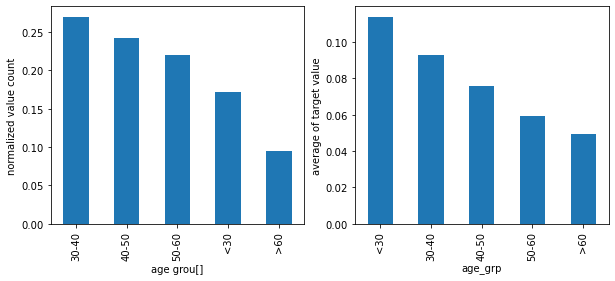

In [376]:
#plotting the percentage of each buckets and average values of TARGET in each buckets.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp0.age_grp.value_counts(normalize=True).plot.bar()
plt.ylabel('normalized value count')
plt.xlabel('age grou[]')
plt.subplot(1,2,2)
inp0.groupby('age_grp')['TARGET'].mean().plot.bar()
plt.ylabel('average of target value')
plt.show()

In [ ]:
AMT_ANNUITY v TARGET

In [307]:
inp0.AMT_ANNUITY.describe()

count    307500.000000
mean      27109.078896
std       14493.417055
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

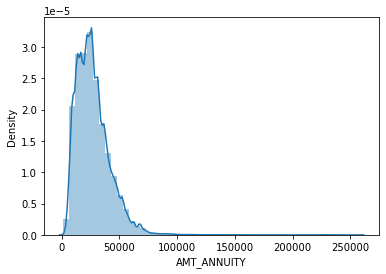

In [308]:
sns.distplot(inp0.AMT_ANNUITY.dropna())

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

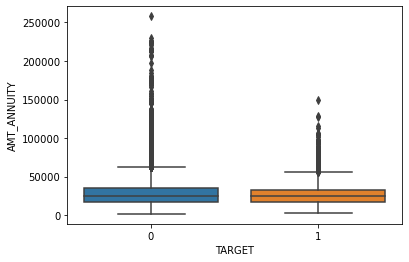

In [309]:
#plot the boxplot of age with TARGET
sns.boxplot(data=inp0,x='TARGET',y='AMT_ANNUITY')

##### making buckets from age columns 

In [310]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp0['AMT_ANNUITY_grp']=pd.cut(inp0.AMT_ANNUITY,[0,10000,20000,30000,40000,9999999],labels=['Very low','low','medium','high','very high'])
inp0.AMT_ANNUITY_grp.head()

0      medium
1        high
2    Very low
3      medium
4      medium
Name: AMT_ANNUITY_grp, dtype: category
Categories (5, object): ['Very low' < 'low' < 'medium' < 'high' < 'very high']

In [311]:
inp0[['AMT_ANNUITY','AMT_ANNUITY_grp']]

,AMT_ANNUITY,AMT_ANNUITY_grp
0,24700.5,medium
1,35698.5,high
2,6750.0,Very low
3,29686.5,medium
4,21865.5,medium
...,...,...
307506,27558.0,medium
307507,12001.5,low
307508,29979.0,medium
307509,20205.0,medium


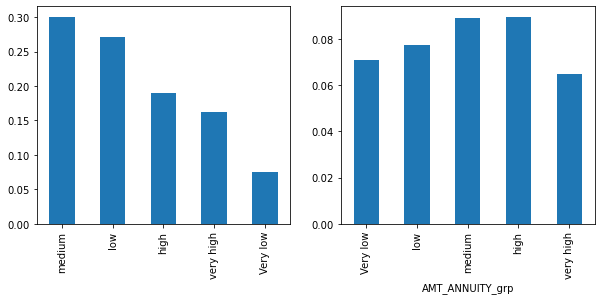

In [312]:
#plotting the percentage of each buckets and average values of TARGET in each buckets.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp0.AMT_ANNUITY_grp.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp0.groupby('AMT_ANNUITY_grp')['TARGET'].mean().plot.bar()
plt.show()

# <font color='green'>10. Reading previous application

In [314]:
inp1= pd.read_csv('previous_application.csv')
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
inp1.shape

(1670214, 37)

In [316]:
inp1.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

- The length of SK_ID_CURR.value_counts() is 338857 and the length of dataset inp1 is 1670214
- This clearly shows there are multiple rows having same SK_ID_CURR
- Means that few applicants have taken loan multiple times

#### Merging the two dataframes into final_df

In [318]:
final_df=pd.merge(inp0,inp1,on='SK_ID_CURR',how='inner')

In [319]:
pd.set_option('display.max_columns',200)

In [320]:
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_grp,AMT_ANNUITY_grp,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637.0,3648,2120,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.0833,0.972200,0.0833,0.972200,0.0833,0.0149,No,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,<30,medium,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188.0,1186,291,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.985100,0.2917,0.985100,0.2917,0.985100,0.2917,0.0714,No,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,high,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188.0,1186,291,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.985100,0.2917,0.985100,0.2917,0.985100,0.2917,0.0714,No,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,high,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,A

In [321]:
final_df.shape

(1413617, 118)

In [322]:
final_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=118)

# <font color='green'>11 Some more analysis

### contract type

<AxesSubplot:title={'center':'Type of Previous Loan Applications'}, ylabel='NAME_CONTRACT_TYPE_y'>

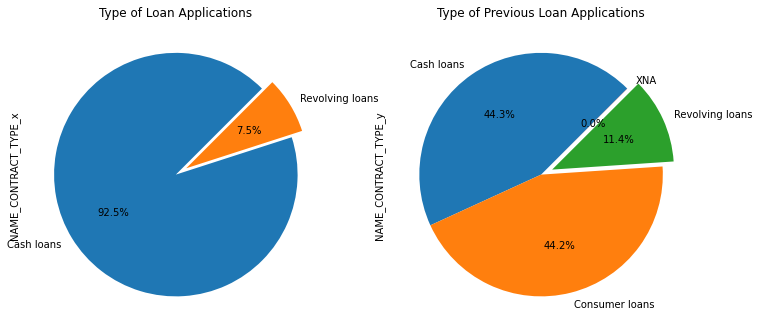

In [324]:
#plotting Type of Loan Applications and Type of Previous Loan Applications as pie charts
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
explode=(0,.1)
plt.title("Type of Loan Applications")
final_df.NAME_CONTRACT_TYPE_x.value_counts().plot.pie(autopct='%1.1f%%',startangle=45,explode=explode)

plt.subplot(1,2,2)
explode=(0,0,.1,0)
plt.title("Type of Previous Loan Applications")
final_df.NAME_CONTRACT_TYPE_y.value_counts().plot.pie(explode=explode,autopct='%1.1f%%',startangle=45)

- From previous to current applications the number of revolving loans have been reduced while cash loans have been increased

#### Contract status

No handles with labels found to put in legend.
No handles with labels found to put in legend.


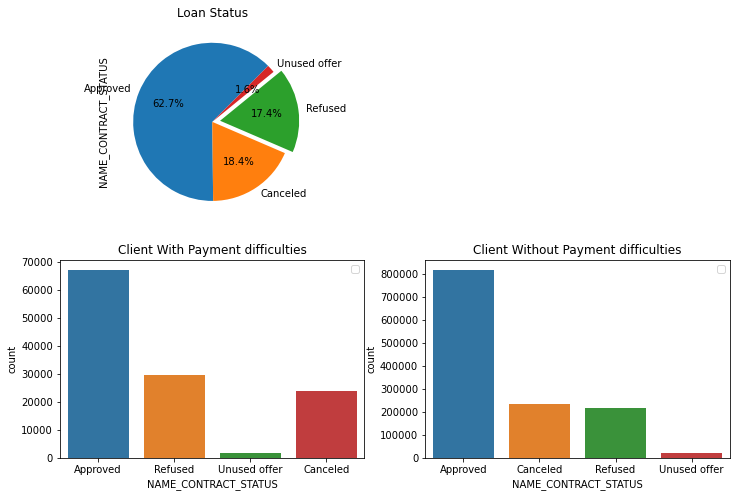

In [332]:


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
explode=(0,0,.1,0)
plt.title("Loan Status")
final_df.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.1f%%',startangle=45,explode=explode)



plt.subplot(2,2,3)
plt.title("Client With Payment difficulties")
df=final_df.where(final_df.TARGET==1)
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.legend()


plt.subplot(2,2,4)
plt.title("Client Without Payment difficulties")
df=final_df.where(final_df.TARGET==0)
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.legend()

- Applications of clients with payment difficulties are often approved than refused.
- A good fraction of clients without payment difficulties were refused by the institution.


#### NAME_CLIENT_TYPE

No handles with labels found to put in legend.
No handles with labels found to put in legend.


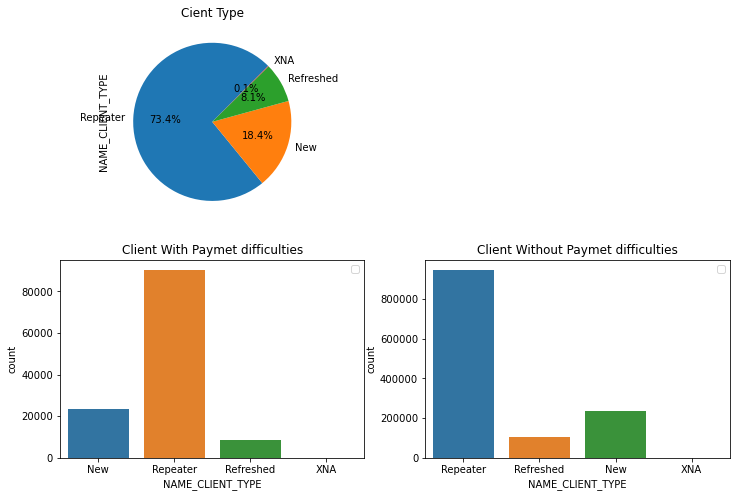

In [333]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)

plt.title('Cient Type')
final_df.NAME_CLIENT_TYPE.value_counts().plot.pie(autopct='%1.1f%%',startangle=45)



plt.subplot(2,2,3)
plt.title("Client With Paymet difficulties")
df=final_df.where(final_df.TARGET==1)
sns.countplot(df.NAME_CLIENT_TYPE)
plt.legend()


plt.subplot(2,2,4)
plt.title("Client Without Paymet difficulties")
df=final_df.where(final_df.TARGET==0)
sns.countplot(df.NAME_CLIENT_TYPE)
plt.legend()

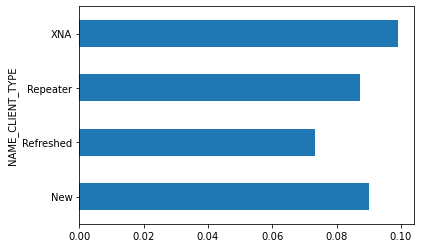

In [343]:

final_df.groupby('NAME_CLIENT_TYPE')['TARGET'].mean().plot.barh()
plt.show()

- Similar pattern in both clients with and without financial issues

####  NAME_CASH_LOAN_PURPOSE vs TARGET

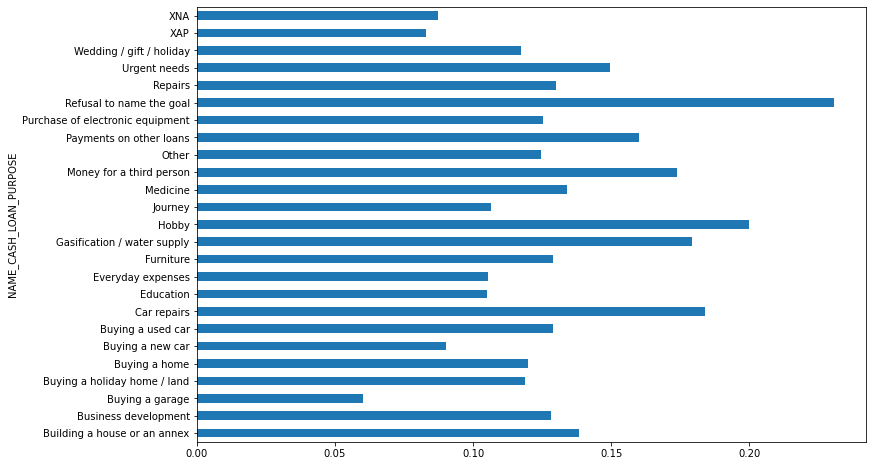

In [341]:
plt.figure(figsize=(12,8))
final_df.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].mean().plot.barh()
plt.show()

- People who refuses to name the purpose are highly likely to deafult compared to people from other categories.
- Clients who apply for loan to buy a garage are less likely to default